# Procesamiento Digital de Señales

## Trabajo Práctico Nº1: Análisis de señales de audio


### Participantes:
- Juan Francisco Di Filippo - juancho-difi@hotmail.com
- Tomás Cosenza - totocosenza17@gmail.com
- Julian Rodriguez - julian.rguez2@gmail.com

Trabajo realizado para la materia Procesamiento Digital de Señales, de la carrera Ingeniería de Sonido de la Universidad Nacional de Tres de Febrero, con fecha de entrega 10 de Octubre de 2022.

## Introducción

En primer lugar, para el desarrollo de este trabajo, será necesario utilizar ciertas librerías que se importarán a continuación.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
import librosa as lr
import soundfile as sf


## Ejercicio 1

Se genera una señal discreta de 2 segundos de duración. Esta señal simula una nota musical LA (440 Hz) con 5 componentes armónicas. La amplitud de los armónicos sigue una ley de decaimiento de 1/n (siendo "n" el número de armónico).
Luego se normaliza la señal y se muestra en una ventana gráfica.

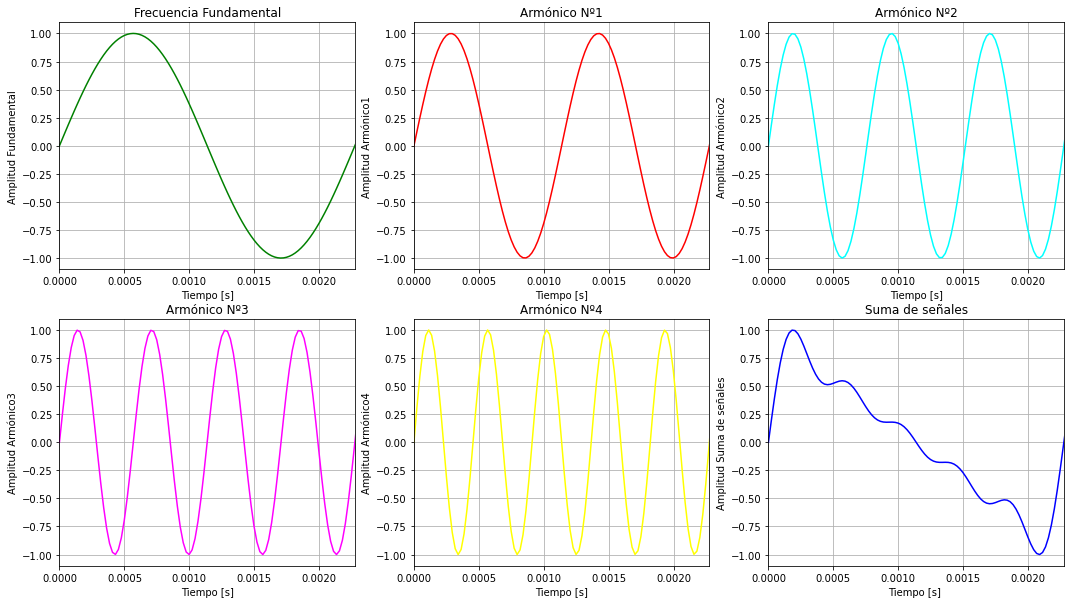

In [27]:
fs=44100 #Se define una frecuencia de muestreo
f = 440 #Se define una frecuencia fundamental
T=1/fs
n = 5 #Número de armónicos
t = np.linspace(0, 2, 2*fs) #vector tiempo. 
colores = ['blue','green','red','cyan','magenta','yellow','black','white'] #lista de colores para los gráficos

fig = plt.figure(figsize = (18,10)) #tamaño de la ventana de la gráfica 
plt.xlabel("Tiempo [s]") #título x
plt.ylabel("Amplitud")#título Y
sig1 = np.zeros(len(t)) #vector de ceros de largo "t"

for n in range(1, 6): #Recorro los armónicos desde 1 hasta 5, siendo 1 la fundamental
    sig = (np.sin(2*np.pi*n*f*t))*1/n #1/n es atenuación de la amplitud
    sig = sig/np.max(sig)
    ax = plt.subplot(2, 3, n)
    ax.plot(t, sig, color = colores[n])
    ax.set_xlabel("Tiempo [s]")
    ax.set_ylabel("Amplitud Armónico"+str(n-1))
    ax.set_xlim(0, 1/f)
    ax.grid()
    if n==1: 
        ax.set_ylabel("Amplitud Fundamental")
        ax.set_title('Frecuencia Fundamental') #acá pongo que si n=1, entonces que diga que es la fundamental en la gráfica
    else: 
        ax.set_title("Armónico Nº"+str(n-1))  


#Ahora se suman las señales
for i in range (1, 6): #se suman los senos en un ciclo
    sig = np.sin(2*np.pi*i*f*t)*1/i #1/i es la atenuación en la amplitud 
    sig1 = sig1+sig
sig1 = sig1/np.max(sig1)     

sig_n = sig1

ax = plt.subplot(2, 3, 6)
ax.plot(t,sig1, color='b')
ax.set_xlabel('Tiempo [s] ')
ax.set_ylabel('Amplitud Suma de señales')
ax.set_title('Suma de señales')
ax.set_xlim(0, 1/f)
ax.grid()

## Ejercicio 2

Para este ejercicio, se generan señales de ruido aleatorias, con distribución normal con valor medio nulo y desviación estandar unitaria. Se va variando la longitud de la señal de ruido y se va calculando luego el desvío estándar. Al final, se imprime la diferencia porcentual del desvío estandar calculado, con respecto al desvío esperado. Esto se hace para cada longitud **L** ingresada.
>_Valor medio_ 
\begin{equation}\label{Ec1}
    \mu = \frac{1}{N}\sum_{n=0}^{N-1}x[n]
\end{equation}

>_Desvío estándar_ 
\begin{equation}\label{Ec2}
    \sigma =\sqrt{\frac{1}{N-1}\sum_{n=0}^{N-1}\left | \left ( x[n]-\mu \right )^{2} \right |}
\end{equation}

In [29]:
def Desvio_Estandar(L): #Defino una función para que genere un vector con valores aleatorios con las condiciones que pide la consigna y que a la vez calcule el desvio
    noise = np.random.normal(0, 1, L) #L es básicamente el dato de la consigna 
    desv = 0 #Acumulador
    sumatoria = 0 #Acumulador
    for i in range (1, L):
      suma = np.absolute((noise[i])**2)
      sumatoria = sumatoria + suma
    sumatoria = sumatoria/(L-1)
    desvio = np.sqrt(sumatoria)
    return(desvio)
    print(desvio)

def  porcentaje(a): #Función que calcula el porcentaje
    if a<=1:
        porcentaje = a*100
    else:
        porcentaje = 100
    return porcentaje

#Se calculan los devíos utilizando la función definida, y se imprimen los resultados.
desv1 = Desvio_Estandar(5) 
porcentaje1 = porcentaje(desv1)
print('El desvio con L=5 es: ', desv1)
print('El porcentaje con L=5 es :','%',porcentaje1)

desv2 = Desvio_Estandar(10)
porcentaje2 = porcentaje(desv1)
print('El desvio con L=10 es: ', desv2)
print('El porcentaje con L=10 es :','%',porcentaje2)

desv3 = Desvio_Estandar(100)
porcentaje3 = porcentaje(desv3)
print('El desvio con L=100 es: ', desv3)
print('El porcentaje con L=100 es :','%',porcentaje3)

desv4 = Desvio_Estandar(1000)
porcentaje4 = porcentaje(desv4)
print('El desvio con L=1000 es: ', desv4)
print('El porcentaje con L=1000 es :','%',porcentaje4)

desv5 = Desvio_Estandar(10000)
porcentaje5 = porcentaje(desv5)
print('El desvio con L=10000 es: ', desv5)
print('El porcentaje con L=10000 es :','%',porcentaje5)

desv6 = Desvio_Estandar(100000)
porcentaje6 = porcentaje(desv6)
print('El desvio con L=100000 es: ', desv6)
print('El porcentaje con L=100000 es: ','%',porcentaje6)

El desvio con L=5 es:  0.6895155479954758
El porcentaje con L=5 es : % 68.95155479954758
El desvio con L=10 es:  0.546712592405095
El porcentaje con L=10 es : % 68.95155479954758
El desvio con L=100 es:  0.9152023524563063
El porcentaje con L=100 es : % 91.52023524563063
El desvio con L=1000 es:  0.981683249694071
El porcentaje con L=1000 es : % 98.1683249694071
El desvio con L=10000 es:  0.9993521203797345
El porcentaje con L=10000 es : % 99.93521203797346
El desvio con L=100000 es:  0.9980150296064589
El porcentaje con L=100000 es:  % 99.80150296064589


Se puede notar que los valores dan diferentes cada vez que se ejecuta el código, esto se debe a que la señales de ruido están generadas de forma aleatoria.
Por otra parte, se observa que para un L>100, el porcentaje suele dar prácticamente 100%.

## Ejercicio 3

Se utilizará la señal generada en el Ejercicio 1, y se le sumarán 3 ruidos con valor medio nulo y desvíos 0.1, 1 y 3. Los primeros 3 gráficos representan esas señales obtenidas.
Luego, se le calcula la relación señal-ruido a cada una de las señales.
Por último, se les suma a las señales una componente de contínua (nivel DC) y se repite el procedimiento.

>La relación señal-ruido de una señal se puede calcular usando la siguiente ecuación.
\begin{equation}\label{Ec1}
    SNR=\frac{Amplitud_{señal}}{σ_{ruido}}
\end{equation}

La SNR de sig01 es  13.162077359135298
La SNR de sig1 es  5.053518013672794
La SNR de sig3 es  4.2925956582574365
La SNR de sig01 con una componente de continua es  19.66021516309706
La SNR de sig1 con una componente de continua es  5.396026671473169
La SNR de sig3 con una componente de continua es  4.298044558699192


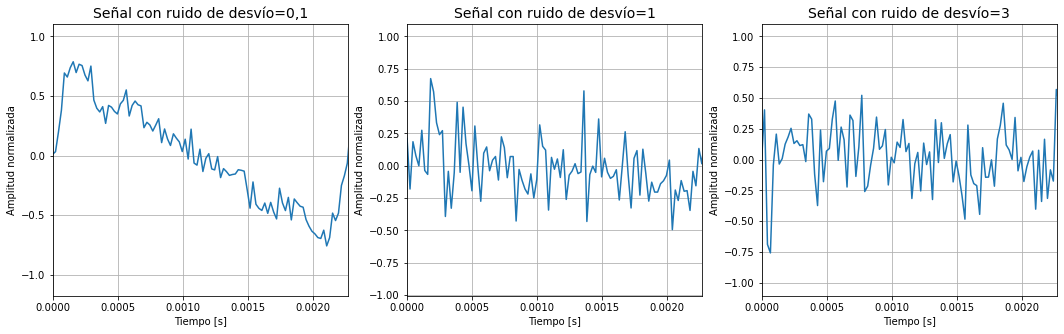

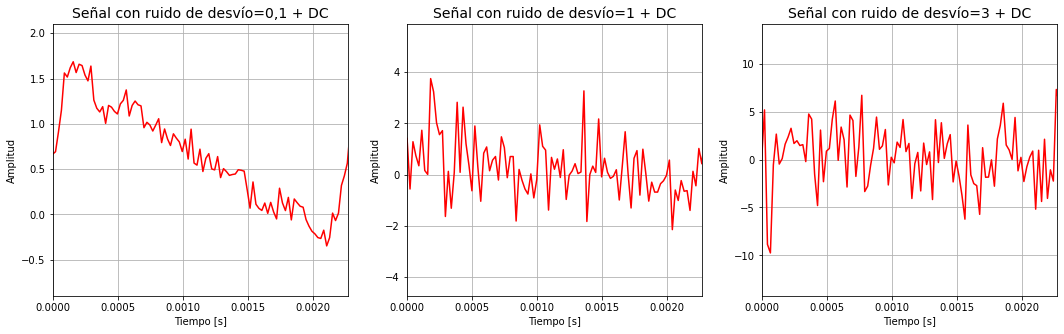

In [30]:
fs=44100 #Frecuencia de muestreo
f = 440
T=1/fs
t = np.linspace(0, 2, 2*fs) #vector tiempo

# Se genera el ruido
noise01 = np.random.normal(0, 0.1, 2*fs) 
noise1 = np.random.normal(0, 1, 2*fs)
noise3 = np.random.normal(0, 3, 2*fs)

#Se suman las señales con el ruido, se normaliza y se grafica

fig = plt.figure(figsize = (18,5)) #tamaño de la ventana de la gráfica
sig01 = noise01 + sig_n  #se suma la señal con el ruido
sig01_n = sig01/np.max(sig01) #se normaliza
ax1 = plt.subplot(1, 3, 1)
ax1.plot(t, sig01_n) #se grafica
ax1.set_title('Señal con ruido de desvío=0,1', fontsize=14)
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Amplitud normalizada')
ax1.set_xlim(0, 1/f)
ax1.grid()

sig1= noise1 + sig_n
sig1_n = sig1/np.max(sig1)
ax2 = plt.subplot(1, 3, 2)
ax2.plot(t, sig1_n)
ax2.set_title('Señal con ruido de desvío=1', fontsize=14)
ax2.set_xlabel('Tiempo [s]')
ax2.set_ylabel('Amplitud normalizada')
ax2.set_xlim(0, 1/f)
ax2.grid()

sig3 = noise3 + sig_n
sig3_n =sig3/np.max(sig3)
ax3 = plt.subplot(1, 3, 3)
ax3.plot(t, sig3_n)
ax3.set_title('Señal con ruido de desvío=3', fontsize=14)
ax3.set_xlabel('Tiempo [s]')
ax3.set_ylabel('Amplitud normalizada')
ax3.set_xlim(0, 1/f)
ax3.grid()

#Calculando la SNR de las tres señales con ruido
snr01 = np.max(sig01)/0.1
snr1 = np.max(sig1)/1
snr3 = np.max(sig3)/3

print('La SNR de sig01 es ',snr01)
print('La SNR de sig1 es ',snr1)
print('La SNR de sig3 es ',snr3)

#Agregando las componentes de continua de amplitud 0.5

def SeñalMasContinua(sig):
    c = np.random.rand(1)
    sig_c = sig + c
    return(sig_c)
sig_c01 = SeñalMasContinua(sig01)
sig_c1 = SeñalMasContinua(sig1)
sig_c3 = SeñalMasContinua(sig3)


#SNR
snr01_c = (np.max(sig_c01)/0.1)
snr1_c = (np.max(sig_c1)/1)
snr3_c = (np.max(sig_c3)/3)

print('La SNR de sig01 con una componente de continua es ',snr01_c)
print('La SNR de sig1 con una componente de continua es ',snr1_c)
print('La SNR de sig3 con una componente de continua es ',snr3_c)


# Se grafican las señales sig01, sig1 y sig3; con las componentes de contínua sumadas
fig = plt.figure(figsize = (18,5)) #tamaño de la ventana de la gráfica

#Se generan las gráficas
bx1 = plt.subplot(1, 3, 1)
bx1.plot(t, sig_c01, color='red')
bx1.set_title('Señal con ruido de desvío=0,1 + DC', fontsize=14)
bx1.set_xlabel('Tiempo [s]')
bx1.set_ylabel('Amplitud')
bx1.set_xlim(0, 1/f)
bx1.grid()

bx2 = plt.subplot(1, 3, 2)
bx2.plot(t, sig_c1, color='red')
bx2.set_title('Señal con ruido de desvío=1 + DC', fontsize=14)
bx2.set_xlabel('Tiempo [s]')
bx2.set_ylabel('Amplitud')
bx2.set_xlim(0, 1/f)
bx2.grid()

bx3 = plt.subplot(1, 3, 3)
bx3.plot(t, sig_c3, color='red')
bx3.set_title('Señal con ruido de desvío=3 + DC', fontsize=14)
bx3.set_xlabel('Tiempo [s]')
bx3.set_ylabel('Amplitud')
bx3.set_xlim(0, 1/f)
bx3.grid()

Al agregar una componente de contínua, la relación señal-ruido aumenta considerablemente. Esto se debe a que calcula su valor a partir del valor máximo de la señal y el desvío estándar del ruido. Al agregar una componente de contínua, solo cambia el valor máximo de la señal, con lo cual la relación señal-ruido aumenta.
Gráficamente, se puede observar que las señales son iguales, solo que con la componente de contínua queda desplazada en el eje vertical.


## Ejercicio 4

Se generan 10 señales de ruido con ruido aleatorio, pero todos con media nula y desvío estándar 0.3 y se suman a la señal del Ejercicio 1. Luego se calcula el promedio de esas 10 señales y se calcula la relación señal-ruido.
Por último, se repite el procedimiento para 100 y 1000 señales con ruido aleatorio.

In [31]:
fs=44100 #Frecuencia de muestreo
f = 440 #Frecuencia fundamental
T=1/fs
t = np.linspace(0, 1/f, fs) #vector tiempo

#Se generan las señales
def gen_signal(duracion, frecuencia, noise_std):
    t = np.linspace(0, duracion, duracion*44100)
    noise = np.random.normal(0, noise_std, t.size)
    y = np.sin(2*np.pi*frecuencia*t) + noise
    return t, y, noise

# Se crean 2 listas vacías, que después con el bucle FOR se van a ir rellenando con las salidas del generador 
ruido = []
señal_con_ruido = []

for i in range (10):
  t, señal, ruidos = gen_signal(1, f, 3)
  ruido.append(ruidos)
  señal_con_ruido.append(señal)

## Para sumar las señales, se genera un vector de ceros del mismo tamaño que el primer elemento de la lista "señal_con_ruido" 
suma_de_señales = np.zeros(señal_con_ruido[0].size)  
##Promedio = suma de señales/10, divido cada elemento por 10 y después lo sumo
for señal in señal_con_ruido: 
  señal_sobre10 = señal_con_ruido[i]/10
  suma_de_señales = suma_de_señales + señal_sobre10

#SNR
SNR = np.max(señal_sobre10)/3 #SNR, se divide la amplitud por 3
print("El SNR con 10 señales es: ", SNR)

##Se repite para 100 señales
ruido = []
señal_con_ruido = []

for i in range (100):
  t, señal, ruidos = gen_signal(1, f, 3)
  ruido.append(ruidos)
  señal_con_ruido.append(señal)

  suma_de_señales = np.zeros(señal_con_ruido[0].size) 
  for señal in señal_con_ruido: 
    señal_sobre100 = señal_con_ruido[i]/100
    suma_de_señales = suma_de_señales + señal_sobre100 

SNR2 = np.max(señal_sobre100)/3 #SNR, agarro la amplitud y divido por 3 (desvío de la consigna)
print("El SNR con 100 señales es: ", SNR2)    

##Se repite para 1000 señales
ruido = []
señal_con_ruido = []

for i in range (1000):
  t, señal, ruidos = gen_signal(1, f, 3)
  ruido.append(ruidos)
  señal_con_ruido.append(señal)

  suma_de_señales3 = np.zeros(señal_con_ruido[0].size) 
  for señal in señal_con_ruido: 
    señal_sobre1000 = señal_con_ruido[i]/1000
    suma_de_señales3 = suma_de_señales3 + señal_sobre100 

SNR3 = np.max(señal_sobre1000)/3 #SNR, agarro la amplitud y divido por 3 (desvío de la consigna)
print("El SNR con 1000 señales: ", SNR3)    

El SNR con 10 señales es:  0.4057628014382273
El SNR con 100 señales es:  0.04408140512053321
El SNR con 1000 señales:  0.004543752601164543


Se puede observar que, al aumentar la cantidad de señales de ruido generadas y sumadas, la relación señal-ruido disminuye. La relación de cambio es inversa a la forma en la que se incrementa el número de señales adicionadas. Esto tiene sentido, ya que al tener mayor energía en señales de ruido sumadas, se aproximan más en amplitud los niveles de ruido con respecto al nivel de la señal.


## Ejercicio 5

En este ejercicio, se implementa un filtro de media móvil (Moving Average, MA).
Para esto, se implementarán dos funciones: una directa que se llama *xfd=**mediamovild**(x,M)* y otra de implementación recursiva *xfr=**mediamovildr**(x,M)*, en donde **x** es la señal de entrada y **M** es el largo de la ventana de filtrado.

>La respuesta al impulso de un filtro de media movil se calcula como:
\begin{equation}\label{Ec1}
    h[n]=\frac{1}{M+1}\sum_{k=0 }^{M}\delta [n+k]
\end{equation}

>La relación entrada-salida es:
\begin{equation}\label{Ec2}
    y[n]=\frac{1}{M+1}\sum_{k=0}^{M}x[n+k]
\end{equation}

El largo de ventana encontrado es:  45


Text(0, 0.5, 'Amplitud')

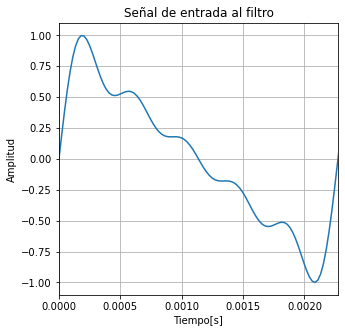

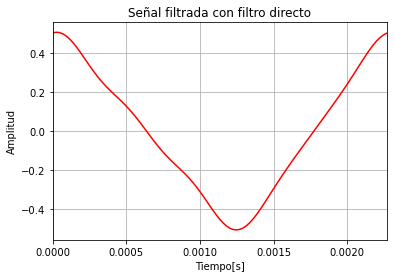

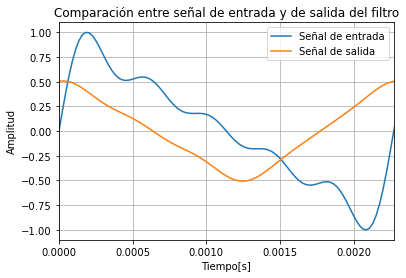

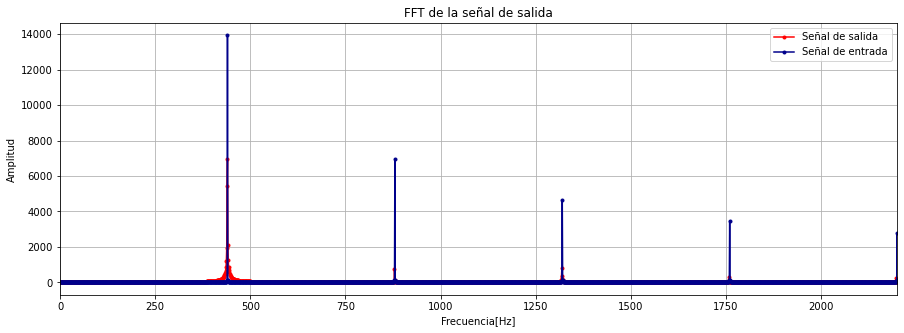

In [32]:
#Se define la señal igual que en el Ejercicio 1
fs = 44100
f = 440
t = np.linspace(0,1 , fs)

for n in range(1, 6): #Recorro los armónicos desde 1 hasta 5, siendo 1 la fundamental
    sig = (np.sin(2*np.pi*n*f*t))*1/n #1/n es atenuación de la amplitud
    sig = sig/np.max(sig)


sig1 = 0
for i in range (1, 6): #sumo los senos en un ciclo
    sig = np.sin(2*np.pi*i*f*t)*1/i #1/i es la atenuación en la amplitud 
    sig1 = sig1+sig
sig1 = sig1/np.max(sig1)

#Se grafica la señal de entrada al filtro
fig = plt.figure(figsize = (5,5)) #tamaño de la ventana de la gráfica
plt.plot(t, sig1)
plt.xlim(0, 1/f)
plt.xlabel('Tiempo[s]')
plt.ylabel('Amplitud')
plt.title('Señal de entrada al filtro')
plt.grid()

#Se define la función de filtro de media movil directo
def mediamovili (x1,m):
  xfi = np.empty(0)
  for i in range (0 , len(x1) - m):
    xfi = np.hstack([xfi, np.mean(x1[i:i + m])]) 
  return xfi

#Se busca el valor de M que cumpla con la condición solicitada
M=0
for i in range(1,fs):
    h=np.hstack([np.ones(i),np.zeros(fs-i)])
    H=np.fft.rfft(h)
    Hn=abs(H)/max(H)
    if Hn[880] <= 0.1:
        M=i-1
        break

#Se aplica el filtro a la señal
xfi = mediamovili (sig1, M)

#Se imprime el valor de M encontrado
print('El largo de ventana encontrado es: ', M)

#Se grafica la señal de filtrada
plt.figure(2)
plt.plot(t[0:len(xfi)], xfi, color='red')
plt.xlim(0, 1/f)
plt.xlabel('Tiempo[s]')
plt.ylabel('Amplitud')
plt.title('Señal filtrada con filtro directo')
plt.grid()

#Se grafica la comparación entre la señal de entrada y de salida del filtro
plt.figure(3)
plt.plot(t[0:len(sig1)], sig1, label='Señal de entrada')
plt.plot(t[0:len(xfi)], xfi, label='Señal de salida')
plt.xlim(0, 1/f)
plt.title('Comparación entre señal de entrada y de salida del filtro')
plt.xlabel('Tiempo[s]')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

#Se calcula la FFT de la señal original
frec = np.arange(0, (fs/2)+1)
trans_o = np.abs(np.fft.rfft(sig1))

#Se calcula la FFT de la señal filtrada
frec = np.arange(0, (fs/2)+1)
trans = np.abs(np.fft.rfft(xfi))

#Se grafica la FFT de la señal filtrada
plt.figure(4, figsize=(15, 5))
plt.plot(frec[0:len(trans)], trans, '.-', label='Señal de salida', color='red')
plt.plot(frec[0:len(trans_o)], trans_o, '.-', label='Señal de entrada', color='darkblue')
plt.xlim(0, 5*f)
plt.title('FFT de la señal de salida')
plt.legend()
plt.grid()
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Amplitud')


########################################################################
# Se define la función para el filtro recursivo

#def media_movil_recursiva (x1 , m1 , n , filtrada = np.empty(0)):
   
#    xoutr = np.hstack([filtrada,np.mean(x1[len(x1)-n-(m1+1):len(x1)-n-(m1+1)+m1])])

 #   if n == 1:
        
  #      return xoutr
    
   # else:
            
    #    return media_movil_recursiva(x1,m1, n-1,xoutr)

#xfr = media_movil_recursiva (sig1, 20 , len(sig1)-20+1 )

#plt.figure(2) #Esto plotea la ventana. La figura 2 tiene amplitud<0.8 y esto se ve reflejado en la fft

#plt.plot(xfr)

#grafica señal filtrada

#xfrout = np.fft.fft(xfr)

#plt.figure(3)

#plt.plot (t, xfrout)

## La función, al ejecutarse, alcanza el límite de recursividad del intérprete.
## De todas formas, se estima que la velocidad de cálculo de la función recursiva
## debería ser menor que la de la función que itera.

## Ejercicio 6

En este ejercicio, se realizará el mismo filtrado que en el Ejercicio 5, pero calculando la convolución lineal entre la señal y la respuesta al impulso del filtro.

Text(0, 0.5, 'Amplitud')

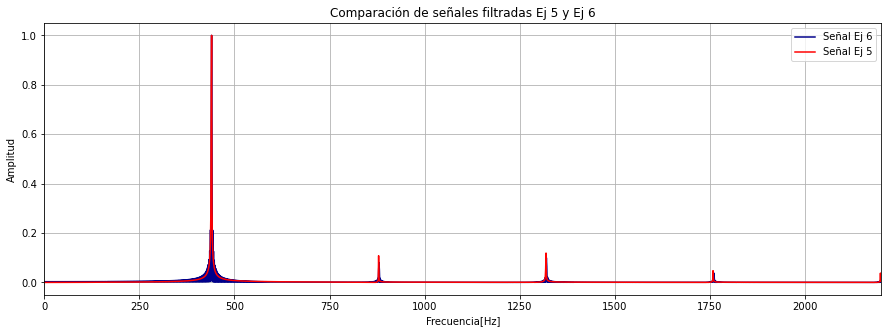

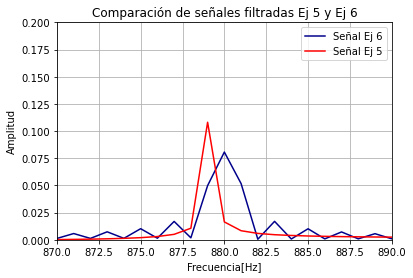

In [7]:
#Se define la señal igual que en el Ejercicio 1
t = np.linspace(1, 0, 44100)
f = 440

for n in range(1, 6): #Recorro los armónicos desde 1 hasta 5, siendo 1 la fundamental
    sig = (np.sin(2*np.pi*n*f*t))*1/n #1/n es atenuación de la amplitud
    sig = sig/np.max(sig)

sig1 = np.zeros(len(t))
for i in range (1, 6): #sumo los senos en un ciclo
    sig = np.sin(2*np.pi*i*f*t)*1/i #1/i es la atenuación en la amplitud 
    sig1 = sig1+sig
sig1 = sig1/np.max(sig1)  


#Se define la función directa de filtro media movil con el largo de ventana como constante M=45 (Ejercicio 5)
def mediamovil(x):
  fs = 44100
  w = np.append(np.ones(45), np.zeros(fs - 45))
  w = w*(1/(45+1))
  xfd = signal.fftconvolve(x, w, mode="same")
  return xfd

#Se calcula la convolución
xfd = mediamovil(sig1)

#Se calcula la FFT de la señal filtrada
n = np.linspace(0, 1, len(xfd))
frec = np.arange(0, (fs/2)+1)
xfd_fft = np.abs(np.fft.rfft(xfd))
xfd_fft/=np.max(xfd_fft) #Se normaliza la señal

#Se normaliza la señal filtrada del Ejercicio 5
trans = np.append(trans, np.zeros(len(frec)-len(trans)))
trans/=np.max(trans)

#Se grafica la señal filtrada en el Ejercicio 5 y Ejercicio 6
plt.figure(figsize=(15, 5))
plt.plot(frec, xfd_fft[:len(frec)], label='Señal Ej 6', color='darkblue')
plt.plot(frec, trans, label='Señal Ej 5', color='red')
plt.xlim(0, 5*f)
plt.title('Comparación de señales filtradas Ej 5 y Ej 6')
plt.legend()
plt.grid()
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Amplitud')

plt.figure(3)
plt.plot(frec, xfd_fft[:len(frec)], label='Señal Ej 6', color='darkblue')
plt.plot(frec, trans, label='Señal Ej 5', color='red')
plt.xlim(870, 890)
plt.ylim(0, 0.2)
plt.title('Comparación de señales filtradas Ej 5 y Ej 6')
plt.legend()
plt.grid()
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Amplitud')

#def mediamovilr (x1,m):
#  cero = np.empty
#  for i in range (0 , len(x1) - m):
#    señal_filtrada = np.hstack([cero, np.mean(x1[i:i + m])])
#  return señal_filtrada
#
#xfr = mediamovilr (sig1, 25)

#plt.figure(3)

Se puede observar, comparando las gráficas, que el resultado de convolucionar la señal con la respuesta al impuslo del filtro, devuelve una respuesta en frecuencia con un desplazamiento temporal respecto al resultado del filtro de media movil; y por otra parte, la respuesta también tiene un rizado en su magnitud. Este rizado se debe a que aparece, en esta operación, la Transformada de Fourier de un pulso rectangular (respuesta al impulso dada), que es una función Sinc.


## Ejercicio 7

En este ejercicio se repite el procedimiento realizado en el Ejercicio 6, con la diferencia que ahora se utilizará una ventana de Blackman en lugar de una ventana rectangular.
>La ventana de Blackman está definida como:
\begin{equation}\label{Ec1}
    v[n]=a_{0}-a_{1}cos\left ( \frac{2\pi n}{M-1} \right )+a_{2}cos\left ( \frac{4\pi n}{M-1} \right )
\end{equation}
>con:
\begin{equation}\label{Ec2}
    a_{0}=0.42\hspace{1cm}a_{1}=0.5\hspace{1cm}a_{2}=0.08
\end{equation}

45


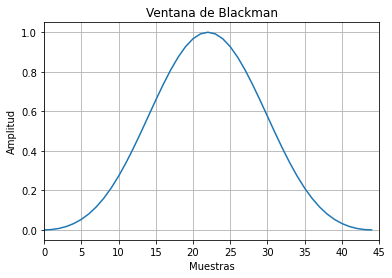

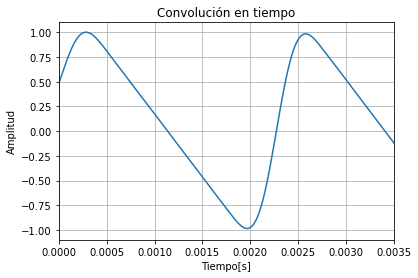

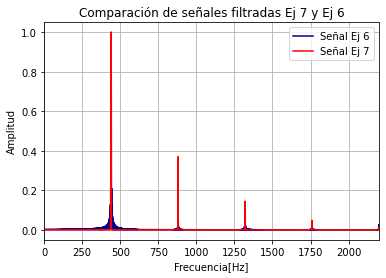

In [10]:
f = 440 #frecuencia fundamental
fs = 44100 #frecuencia de muestreo
t = np.linspace(0,1, 44100)
sig1= np.linspace(0, 1/f, len(t))

for i in range (1, 6): #sumo los senos en un ciclo
    sig = np.sin(2*np.pi*i*f*t)*1/i #1/i es la atenuación en la amplitud 
    sig1 = sig1+sig
x = sig1/np.max(sig1)  
m=0
for i in range(1,fs):
    h=np.hstack([np.ones(i),np.zeros(fs-i)])
    H=np.fft.rfft(h)
    Hn=abs(H)/max(H)
    if Hn[880] <= 0.1:
        m=i-1
        break

n = np.linspace(0,m-1, m)
Bl = 0.42 -0.5*(np.cos((2*np.pi*n)/(m-1))) + 0.08*np.cos((4*np.pi*n)/(m-1))
Bl[m-1:0] = 0

#Se grafica la ventana de Blackman en tiempo
plt.figure(1)
plt.plot(n[0:len(Bl)], Bl)
plt.xlim(0, m)
plt.title('Ventana de Blackman')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()
print(m)
#Se calcula la convolución
convo = signal.fftconvolve(x, Bl, mode="same") #Convolución
convo = convo/np.max(convo)


n = np.linspace(0, 1, len(convo))

#Se grafica la convolución en tiempo
plt.figure(2)
plt.plot(t, convo)
plt.xlim(0, 0.0035)
plt.title('Convolución en tiempo')
plt.xlabel('Tiempo[s]')
plt.ylabel('Amplitud')
plt.grid()



#Se calcula la FFT de la señal obtenida
a = np.abs(np.fft.rfft(convo))
a/=np.max(a)
frec = np.arange(0, (fs/2)+1)

#Se grafica la FFT calculada
plt.figure(3)
plt.xlim(0, 5*f)
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Amplitud')
plt.plot(frec, xfd_fft, label='Señal Ej 6', color='darkblue')
plt.plot(frec, a, label='Señal Ej 7', color='red')
plt.title('Comparación de señales filtradas Ej 7 y Ej 6')
plt.legend()
plt.grid()



Se puede observar, comparando el filtrado con ambas ventanas que la ventana de Blackman no aporta el rizado que se observa con la ventana rectangular, ya que la transformada de una suma de cosenos no es una función Sinc. 

## Ejercicio 8

En este ejercicio se calculará en primera instancia la convolución lineal de la señal sintetizada en el Ejercicio 1, con la respuesta al impulso brindada en un archivo *.wav*.
Luego se calculará la convolución circular de esas mismas dos señales.
Por últmo, se modificarán las longitudes para calcular la convolución circular, obteniendo un resultado idéntico a la convolución lineal.

Antes de realizar estas operaciones, se define la función para el cálculo de la convolución circular.

In [11]:
def circular_convolve(in1, in2, period):
    """
    Circular convolution of two 1-dimensional arrays.
    Circular convolve `in1` and `in2` with given `period`.
    Parameters
    ----------
    in1 : array_like, 1-D
        First input.
    in2 : array_like, 1-D
        Second input. Should have the same number of dimensions as `in1`.
  period : int
        Period of the circular convolution.
    Returns
    -------
    result : array, 1-D
        A 1-dimensional array containing the result of the circular
        convolution of `in1` with `in2`.
    See Also
    --------
    convolve
    Notes
    -----
    The (modulo-M) circular/cyclic/periodic convolution of period :math:`M`
    of the two signals :math:`x[k]` and :math:`h[k]` is defined as
    .. math::
        y[k] = \sum_{\kappa=0}^{M-1} \tilde{x}[k - \kappa] \; \tilde{h}[\kappa]
    where the periodic summations :math:`\tilde{x}[k]` and `\tilde{h}[\kappa]`
    of :math:`x[k]` and :math:`x[k]` are defined as
    .. math::
        \tilde{x}[k] &= \sum_{m = -\infty}^{\infty} x[m \cdot M + k] \\
        \tilde{h}[k] &= \sum_{m = -\infty}^{\infty} h[m \cdot M + k]
    Examples
    --------
    Equivalence of circular and linear convolution:
    >>> from scipy import signal
    >>> a = np.ones(5)
    >>> b = np.ones(5)
    >>> circular_convolve(a, b, 5)
    array([ 5.,  5.,  5.,  5.,  5.])
    >>> np.convolve(a, b, mode='full')
    array([ 1.,  2.,  3.,  4.,  5.,  4.,  3.,  2.,  1.])
    >>> circular_convolve(a, b, 9)
    array([ 1.,  2.,  3.,  4.,  5.,  4.,  3.,  2.,  1.])
    """
    in1 = _periodic_summation(in1, period)
    in2 = _periodic_summation(in2, period)

    return np.fromiter([np.dot(np.roll(in1[::-1], k+1), in2)
                        for k in np.arange(period)], float)


def _periodic_summation(x, period):
    """
    Periodic summation of 1-dimensional array or zero-padding.
    If the length of the array is longer or equal to the given `period`
    a periodic summation of `x` is perfomed, otherwise zero-padding to length
    `period`.
    """
    len_x = len(x)
    rows = int(np.ceil(len_x/period))

    if (len_x < int(period*rows)):
        x = np.pad(x, (0, int(period*rows-len_x)), 'constant')

    x = np.reshape(x, (rows, period))

    return np.sum(x, axis=0)



<ipython-input-12-57186ff1c795>:41: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(cc == conv_lineal) #Esto devuelve falso, evidentemente no son iguales


False
[ True  True  True ...  True  True  True]


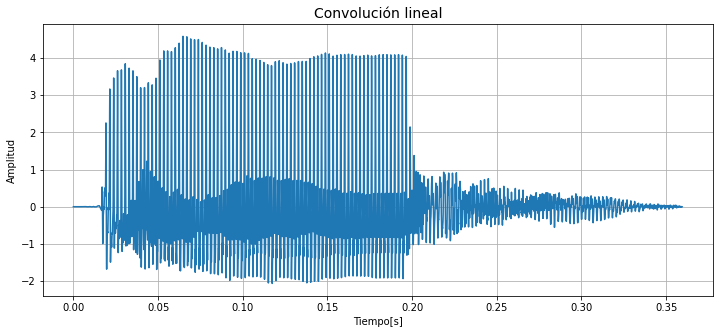

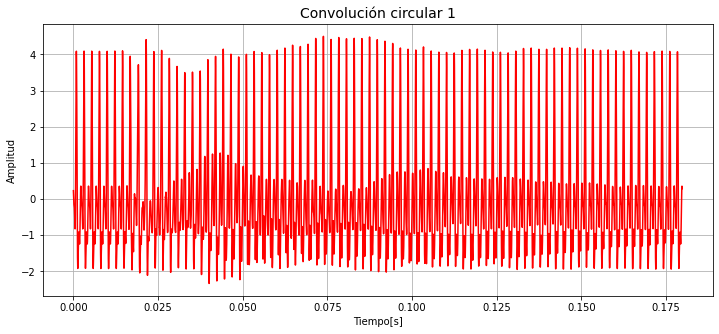

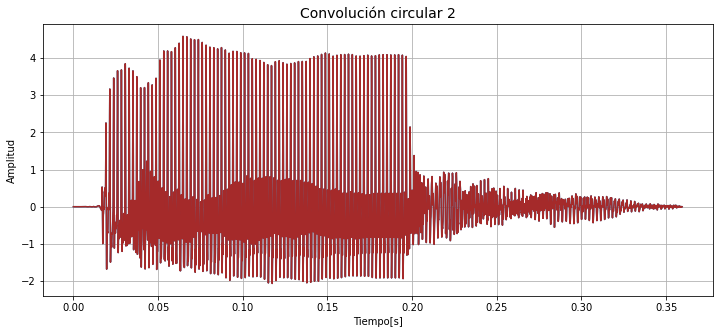

In [12]:
f = 440
fs = 44100

audio1, sfreqc = lr.load('Resp_Imp.wav')
t = np.linspace(0,len(audio1)/fs, num = len(audio1))


sig1= np.zeros(len(t))

for i in range (1, 6): #sumo los senos en un ciclo
    sig = np.sin(2*np.pi*i*f*t)*1/i #1/i es la atenuación en la amplitud 
    sig1 = sig1+sig
x = sig1/np.max(sig1)  


#Se calcula la convolución lineal
conv_lineal = np.convolve(audio1, x) 
t1 = np.linspace(0, (len(audio1)+len(x)-1)/fs, len(conv_lineal))#se define el vector de tiempo teniendo en cuenta que se debe cumplir N>=M+L-1

#Se grafica la convolución lineal
plt.figure(1, figsize=(12, 5))
plt.plot(t1, conv_lineal)
plt.title('Convolución lineal', fontsize=14)
plt.xlabel('Tiempo[s]')
plt.ylabel('Amplitud')
plt.grid()


#Se calcula la convolución circular 1
cc = circular_convolve(x, audio1, len(x)) #convolución circular tomando como periodo de conv. el largo de la señal del punto 1
t1 = np.linspace(0, (len(audio1)+len(x)-1)/fs, len(cc)) #vector tiempo para la convolución circular

#Se grafica la convolución circular 1
plt.figure(2, figsize=(12, 5))
plt.plot(t, cc, color='red')
plt.title('Convolución circular 1', fontsize=14)
plt.xlabel('Tiempo[s]')
plt.ylabel('Amplitud')
plt.grid()
###############Gráficamente las funciones no son parecidas
print(cc == conv_lineal) #Esto devuelve falso, evidentemente no son iguales

#Se calcula la convolución circular 2
cc2 = circular_convolve(x, audio1, len(x)+len(audio1)-1) #Se redefine el período de la convolución circular (N>=M+L-1)
t = np.linspace(0, (len(audio1)+len(x)-1)/fs, len(cc2)) #vector de tiempo para la segunda convolución circular

#Se grafica la convolución circular 2
plt.figure(3, figsize=(12, 5))
plt.plot(t, cc2)
plt.plot(t, conv_lineal, color='brown')
plt.title('Convolución circular 2', fontsize=14)
plt.xlabel('Tiempo[s]')
plt.ylabel('Amplitud')
plt.grid()
#Las señales son idénticas, gráficamente se encuentran solapadas
#Para tener mayor certeza,  las convoluciones pueden ser comparádas con un booleano
print(cc2==conv_lineal) #El booleano devuelve "True" para cada elemento de las señales, por lo tanto son idénticas
#Se generan los archivos wav 
sf.write('Convolución_lineal.wav', conv_lineal/np.max(conv_lineal), 44100) #Convolución lineal
sf.write('Convolución_circular.wav', cc/np.max(cc), 44100) #Convolución circular 1
sf.write('Convolución_circular2.wav', cc2/np.max(cc2), 44100) #Convolución circular 2

## Ejercicio 9

En este ejercicio se calculan los tres siguientes parámetros temporales de una señal discreta. Se importan luego tres señales en formato *.wav* y se calculan los parámetros para dichas señales. Se trata de: Energía en tiempos cortos (Short Time Energy), Tasa de cruce por cero (Zero-Crossing Rate) y Entropía de la Energía (Entropy of Energy).

<ipython-input-25-498578eba4ea>:108: RuntimeWarning: divide by zero encountered in log2
  entropy_sub [i] = (-1) *(energy[i])*np.log2(np.abs(energy[i]))
<ipython-input-25-498578eba4ea>:108: RuntimeWarning: invalid value encountered in double_scalars
  entropy_sub [i] = (-1) *(energy[i])*np.log2(np.abs(energy[i]))


El valor de entropía de la energía para la señal 1 es:  -2.061217497880117e+19
El valor de entropía de la energía para la señal 2 es:  -399153032.93215185
El valor de entropía de la energía para la señal 3 es:  17224.610488890732


Text(0, 0.5, 'Amplitud')

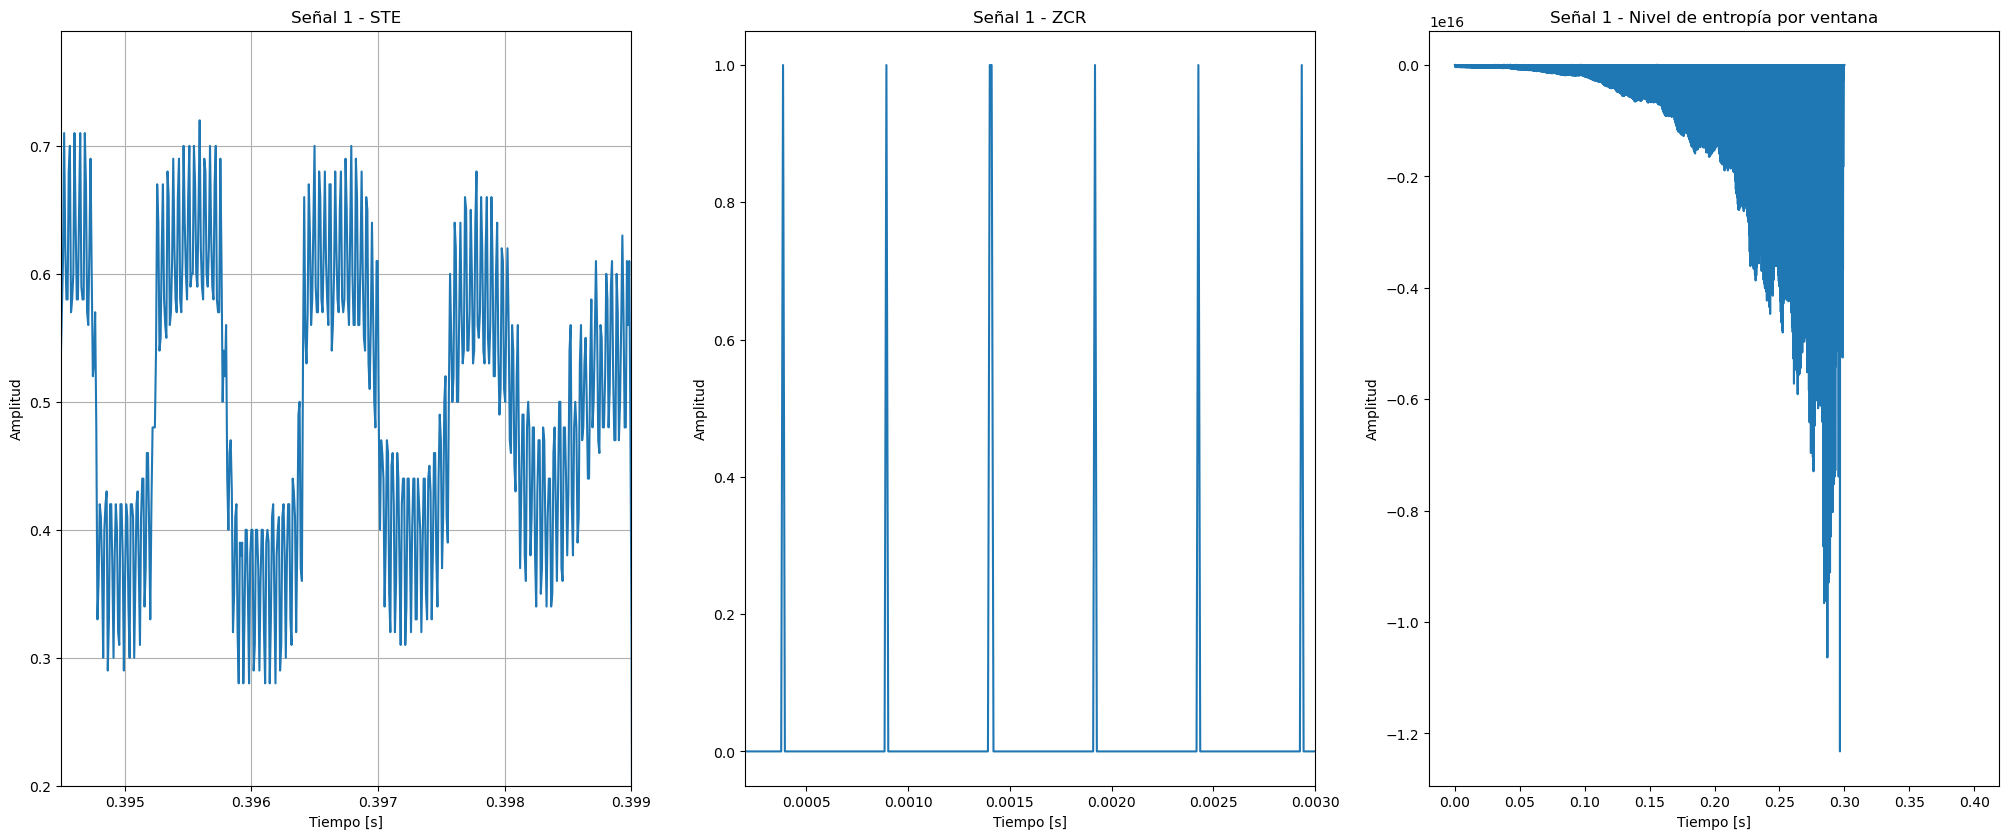

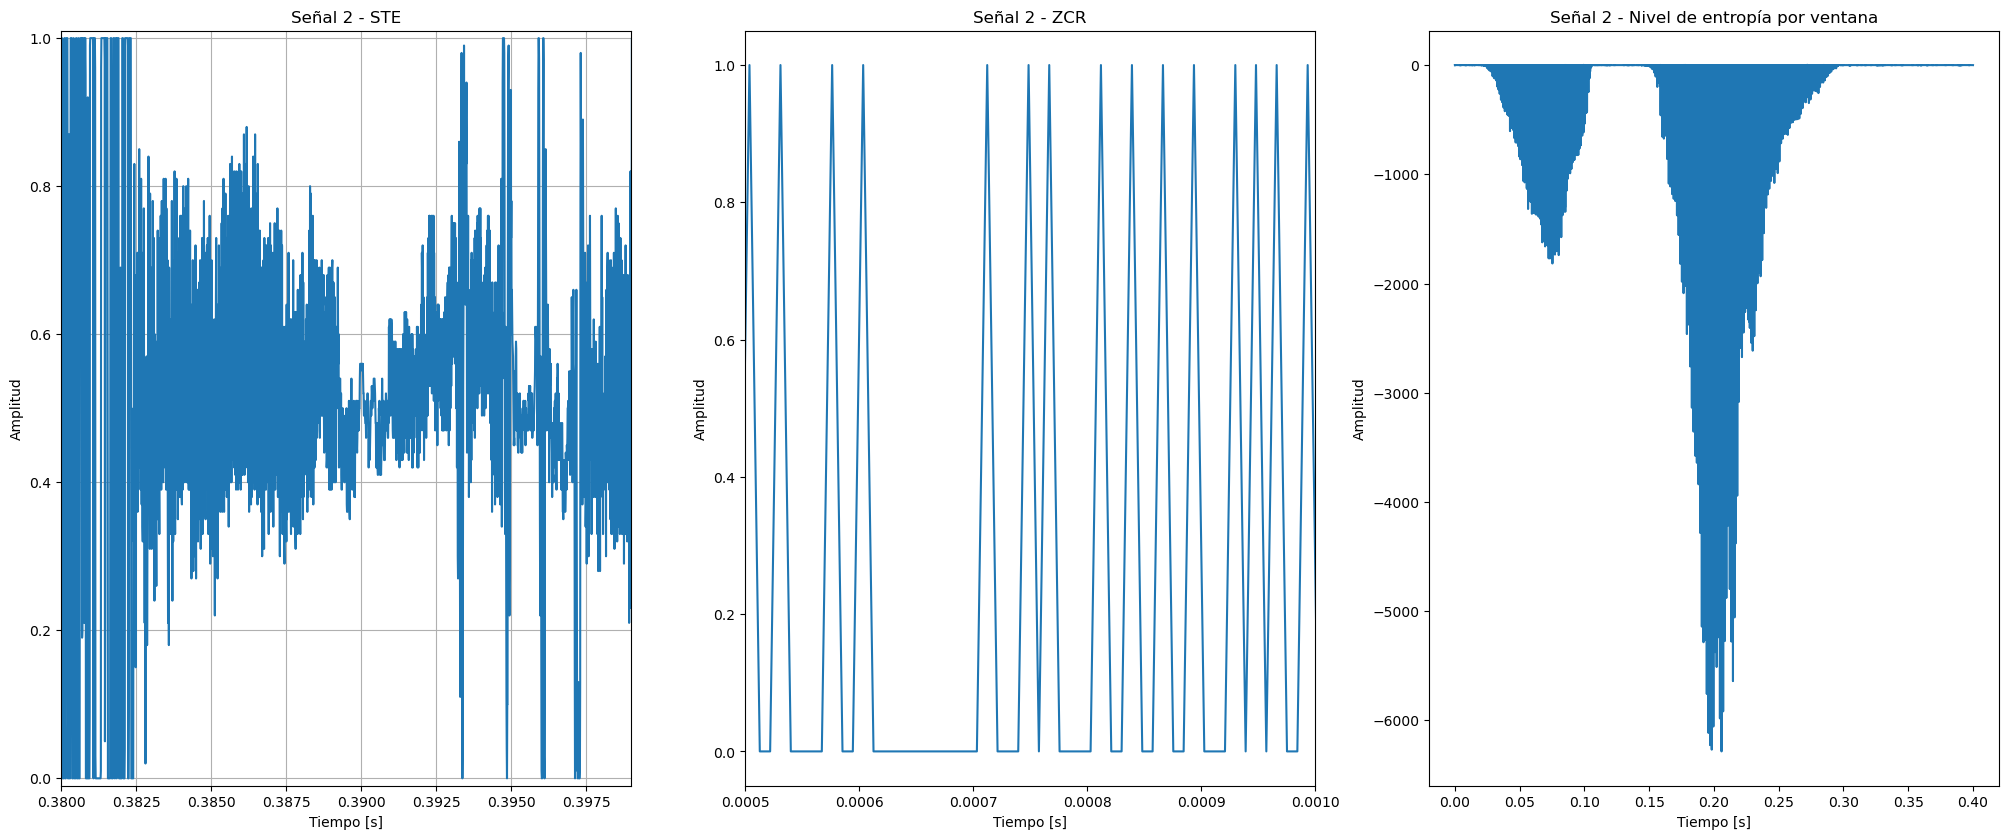

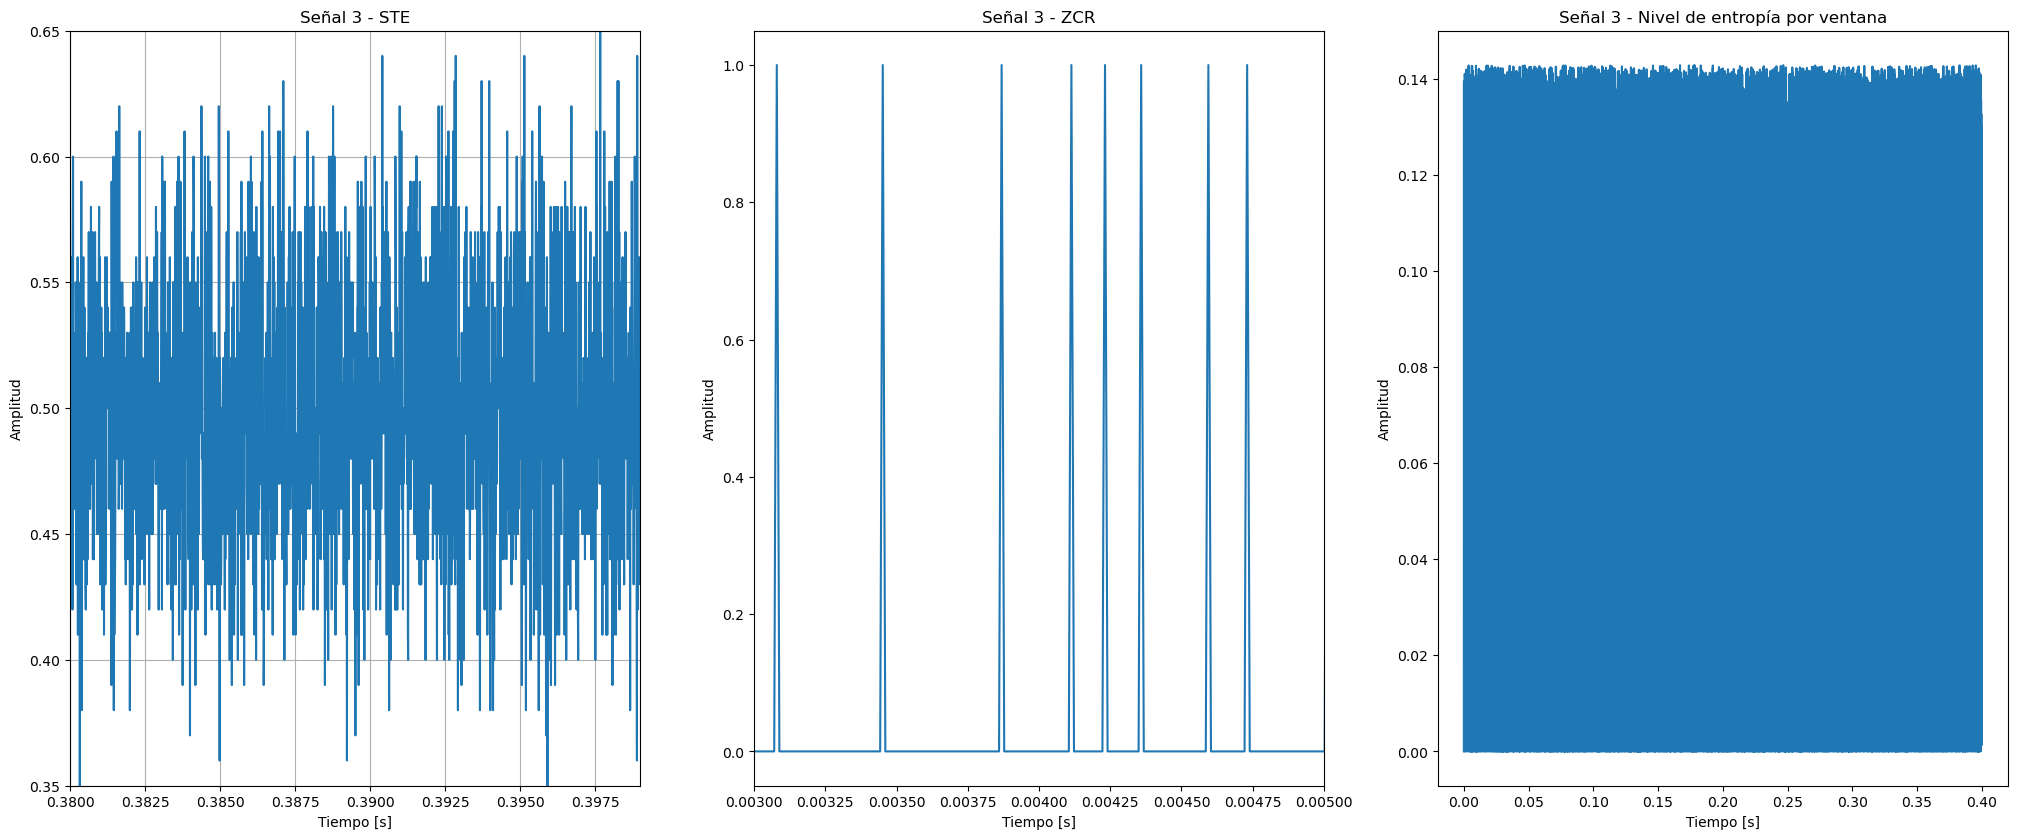

In [25]:

def calcula_valor_rms (valor_in):
    
    valorrms = np.sqrt(np.abs(valor_in**2))
    
    return (valorrms)

def calcula_valor_ste (valor_in ):
    
    ste=np.mean(valor_in*valor_in) 
    
    return (ste)


    
    #zcr = np.abs(np.sign(valor_in(i))-np.sign(valor_in(i-1)))


def ventaneo_zcr (w, signal):
    
    
    
    signalout = np.empty(0)
        
    if len (signal) % w !=0 :
            
            signalout = np.hstack([signal,np.zeros(w - len (signal) % w )])
           
    else:
                
            signalout = signal
                
    
    zcr_out= (np.zeros(w))
    
    zcr_out2 = np.empty(0)    
    
    vector_signo = np.sign(signalout)

    sgn_2 = np.empty(0)
    
    for j in range (0,len(signalout)//w):
        
        sgn=np.zeros(w)
        
        for i in range (0 , w):
            sgn [i] =((vector_signo[i + (w*j)] - vector_signo[i-1 + (w*j)]))//w
        
        sgn_2 = np.hstack([sgn_2,sgn])

    zcr_out2 = np.abs(sgn_2)
    
    zcr_sum = np.sum (zcr_out2[:])
    
    return (zcr_out2 , signalout , vector_signo,zcr_sum )

def ventaneo_ste ( w , signal):
    
    
    if len (signal) % w !=0 :
            
            signalout = np.hstack([signal,np.zeros(w - len (signal) % w )])
           
    else:
                
            signalout = signal
    
    ste_out= (np.zeros(len(signalout)// w))
    
    
    for i in range (0 , len(signalout) // w):
        
        ste_out [i] = calcula_valor_ste(signalout[i*w:(i+1)*(w)]//w)#calcula_ste (signalout[i*w : (i+1)*w], w)
        
    return (ste_out , signalout)


def entropy_energy (w , signal ):
    
    signalout = np.empty(0)
        
    if len (signal) % w !=0 :
            
            signalout = np.hstack([signal,np.zeros(w - len (signal) % w )])
           
    else:
                
            signalout = signal
                
    
    entropy = np.empty(0)
    
    
    energy_window = np.sum( (np.square((signal[0:w]))))
    
    for j in range (0,len(signalout)//w-1):
        
        energy = np.zeros(w)
        
        entropy_sub = np.zeros(w)

        
        for i in range (0 , w-1) :
        
            
        
            energy [i] = np.abs(np.square(signal[i+(w*j) -1]) /(np.finfo(float).eps+(energy_window))) 
            
            entropy_sub [i] = (-1) *(energy[i])*np.log2(np.abs(energy[i]))
    
    
        entropy = np.hstack([entropy , entropy_sub])
        
    return (entropy )
   
def calcula_entropy_sum (invalue):
    
    sumatoria = 0
    
    ubicacion_nan =[]
    
    for i in range (0, len(invalue)):
    
        if np.isnan(invalue[i]):
        
            sumatoria =  sumatoria+0
            ubicacion_nan = np.hstack([ubicacion_nan,i])
        else:
        
            sumatoria = sumatoria + invalue[i]    
  
    return (sumatoria)


#Se importan las señales de audio
señal1, fs = sf.read('Sen_al1.wav')
señal2, fs = sf.read('Sen_al2.wav')
señal3, fs = sf.read('Sen_al3.wav')

fs = 44100
M = 100
t = np.linspace(0, len(señal1)/fs, fs)


#STE
STE_calculado_1 = ventaneo_ste (M, señal1)
STE_calculado_2 =ventaneo_ste (M, señal2)
STE_calculado_3= ventaneo_ste (M, señal3)


#ZCR
f = 440

ZCR_calculado_1 = ventaneo_zcr(M, señal1)
ZCR_calculado_2 = ventaneo_zcr(M, señal3)
ZCR_calculado_3 = ventaneo_zcr(M, señal2)


t = np.linspace(0.4, 1/len(señal1), fs)

#Entropy energy

entropy1= entropy_energy (M, señal1)
entropy2 = entropy_energy(M, señal2)
entropy3 = entropy_energy(M, señal3)


suma_entropia1 = calcula_entropy_sum(entropy1)
suma_entropia2 = calcula_entropy_sum(entropy2)
suma_entropia3 = calcula_entropy_sum(entropy3)

print('El valor de entropía de la energía para la señal 1 es: ', suma_entropia1)
print('El valor de entropía de la energía para la señal 2 es: ', suma_entropia2)
print('El valor de entropía de la energía para la señal 3 es: ', suma_entropia3)

##################Ploteo 
#Ploteo para los parámetros de la señal 1
figure, (ax1, ax2, ax7) = plt.subplots(1,3, figsize=(25,10)  , dpi=100)
ax1.plot(t[:len(STE_calculado_1[0])], STE_calculado_1[0])
ax2.plot(t, ZCR_calculado_1[0][:len(t)])
ax1.set_title("Señal 1 - STE")
ax2.set_title("Señal 1 - ZCR")
ax1.set_xlabel("Tiempo [s]")
ax1.set_ylabel("Amplitud")
ax2.set_xlabel("Tiempo [s]")
ax2.set_ylabel("Amplitud")
ax1.grid()
ax1.set_xlim(0.3945, 0.399 )
ax1.set_ylim(0.2, 0.79)
ax2.set_xlim(0.0002, 0.0030)
ax7.set_title("Señal 1 - Nivel de entropía por ventana")
ax7.plot(t, entropy1[:len(t)])
ax7.set_xlabel("Tiempo [s]")
ax7.set_ylabel("Amplitud")

#Parámetros de la señal 2
figure2, (ax3, ax4, ax8) = plt.subplots(1,3, figsize=(25,10)  , dpi=100)
ax3.plot(t[:len(STE_calculado_2[0])], STE_calculado_2[0])
ax4.plot(t, ZCR_calculado_2[0][:len(t)])
ax3.set_title("Señal 2 - STE")
ax4.set_title("Señal 2 - ZCR")
ax3.set_xlabel("Tiempo [s]")
ax3.set_ylabel("Amplitud")
ax4.set_xlabel("Tiempo [s]")
ax4.set_ylabel("Amplitud")
ax3.grid()
ax3.set_xlim(0.38, 0.399 )
ax3.set_ylim(-0.01, 1.01)
ax4.set_xlim(0.0005, 0.0010)
ax8.set_title("Señal 2 - Nivel de entropía por ventana")
ax8.plot(t, entropy2[:len(t)])
ax8.set_xlabel("Tiempo [s]")
ax8.set_ylabel("Amplitud")

#Parámetros de la señal 3
figure3, (ax5, ax6, ax9) = plt.subplots(1,3, figsize=(25,10)  , dpi=100)
ax5.plot(t[:len(STE_calculado_3[0])], STE_calculado_3[0])
ax6.plot(t, ZCR_calculado_3[0][:len(t)])
ax5.set_title("Señal 3 - STE")
ax6.set_title("Señal 3 - ZCR")
ax5.set_xlabel("Tiempo [s]")
ax5.set_ylabel("Amplitud")
ax6.set_xlabel("Tiempo [s]")
ax6.set_ylabel("Amplitud")
ax5.grid()
ax5.set_xlim(0.38, 0.399 )
ax5.set_ylim(0.35, 0.65)
ax6.set_xlim(0.0030, 0.0050)
ax9.set_title("Señal 3 - Nivel de entropía por ventana")
ax9.plot(t, entropy3[:len(t)])
ax9.set_xlabel("Tiempo [s]")
ax9.set_ylabel("Amplitud")

En este punto se definen tres funciones que actúan sobre el dominio del tiempo, y brindan distintos parámetros para conocer el comportamiento de la señal analizada.\
    En primer lugar, la función Short Time Energy (STE) que calcula el nivel de energía por ventana, normalizada según el ancho de la misma. Se observa que tiene mayores fluctuaciones en señales que contienen discurso humano.\
    En segundo lugar, la función Zero Cross Rate (ZCR) indica la cantidad cambios en el signo de la señal por ancho de ventana, y devuelve una función de deltas ubicadas en los instantes en los que la señal cambió su signo.\
    Por último, la función de Entropy of Energy que calcula los niveles de energía según ventanas, para luego dividirlos por el nivel medido para la longitud total de la señal, y así después utilizar estos valores para calcular el nivel de entropía de la señal. 

## Ejercicio 10

En este ejercicio se calculan los tres siguientes parámetros frecuenciales de una señal discreta. Se importan luego tres señales en formato *.wav* y se calculan los parámetros para dichas señales. Se trata de:\
Centroide Espectral (Spectral Centroid)\
Flujo Espectral (Spectral Flux)\
Decaimiento Espectral (Spectral Rolloff).

<ipython-input-22-eb9f10ef934b>:170: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  flux1/=np.max(flux1[0])
<ipython-input-22-eb9f10ef934b>:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  flux2/=np.max(flux2[0])
<ipython-input-22-eb9f10ef934b>:172: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  flux3/=np.max(flux3[0])
C:\Users\Juli\an

(-1.0, 1.0)

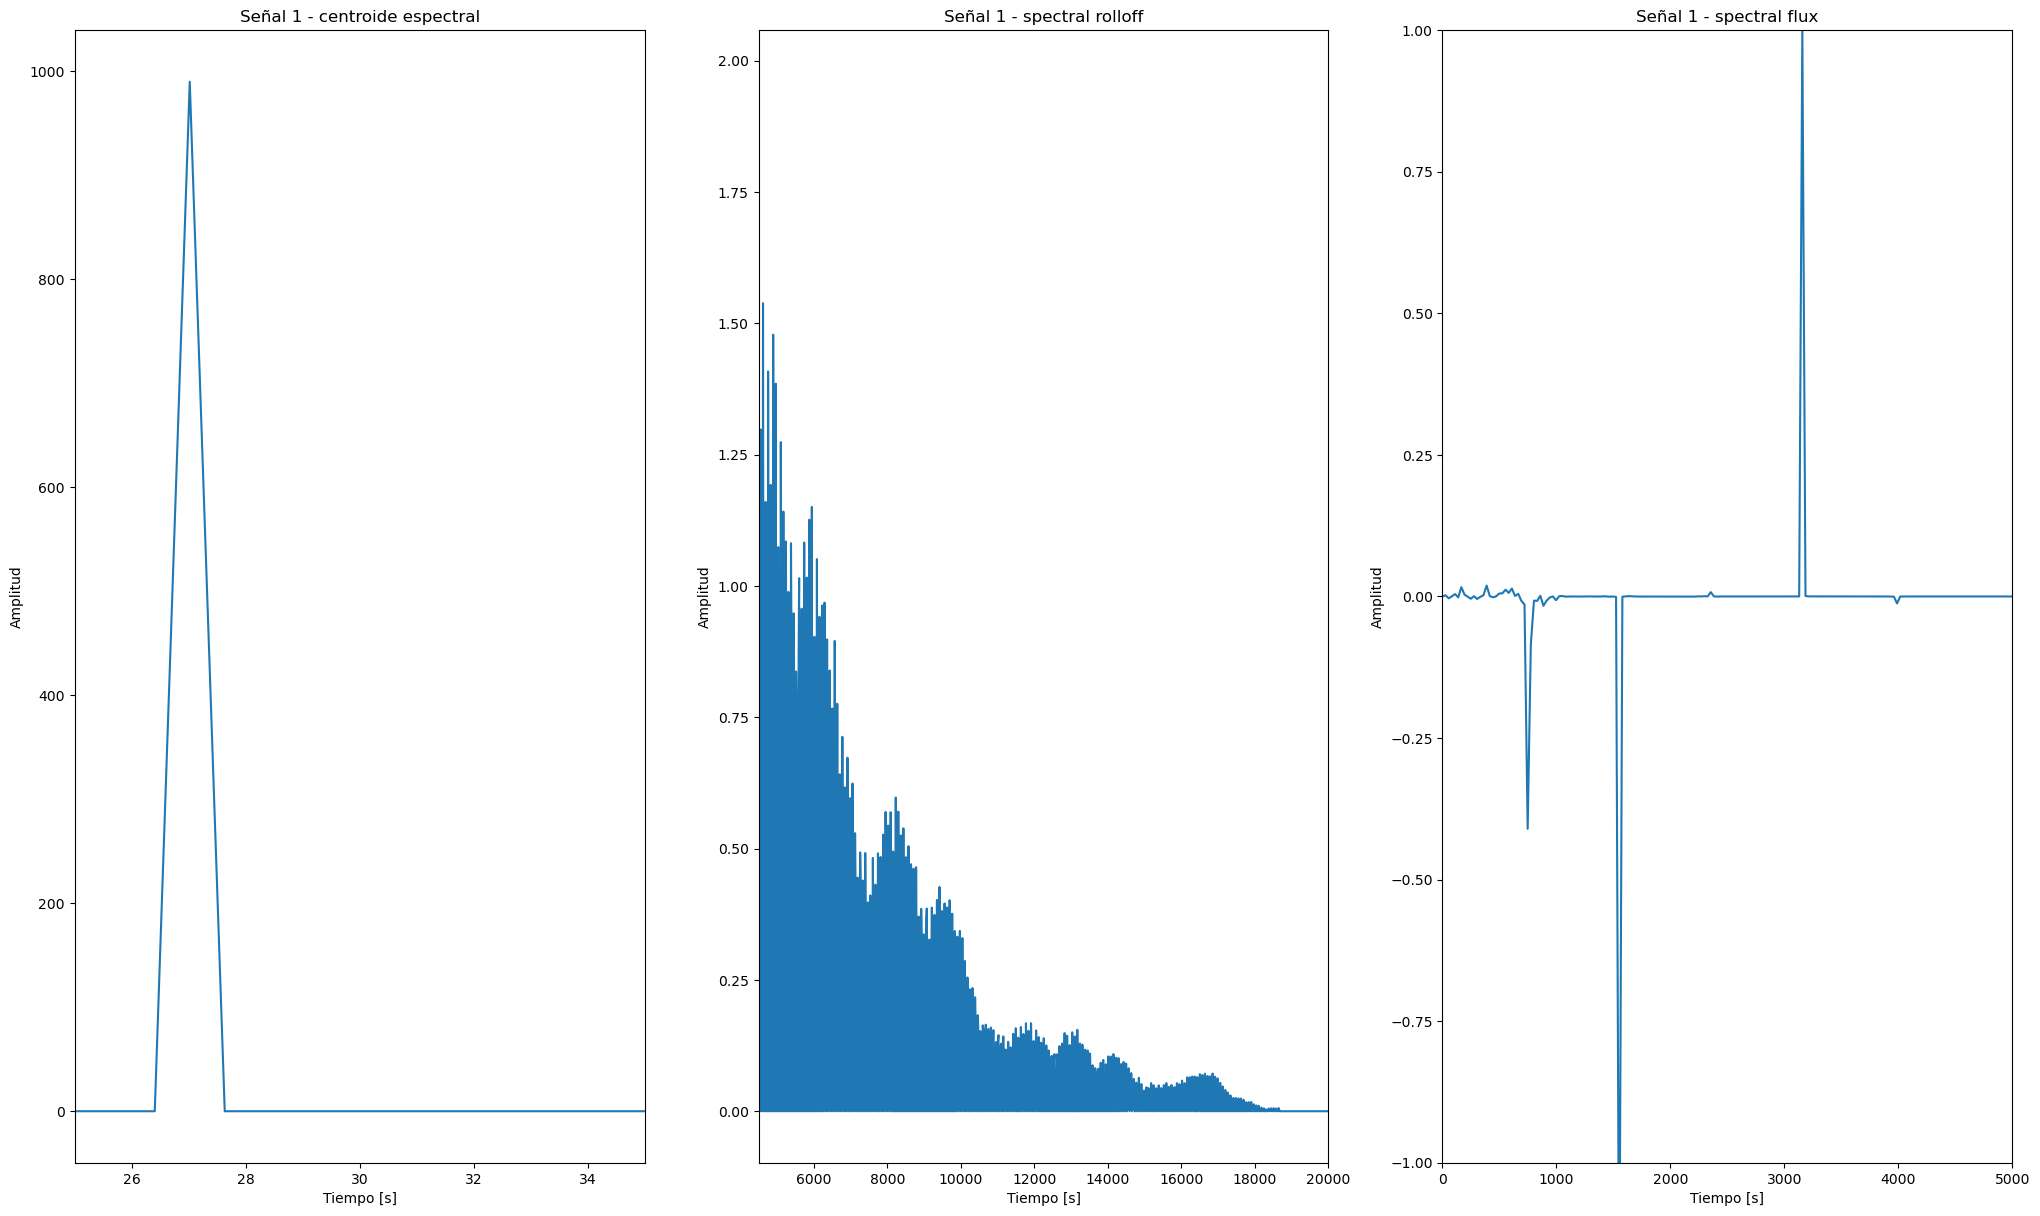

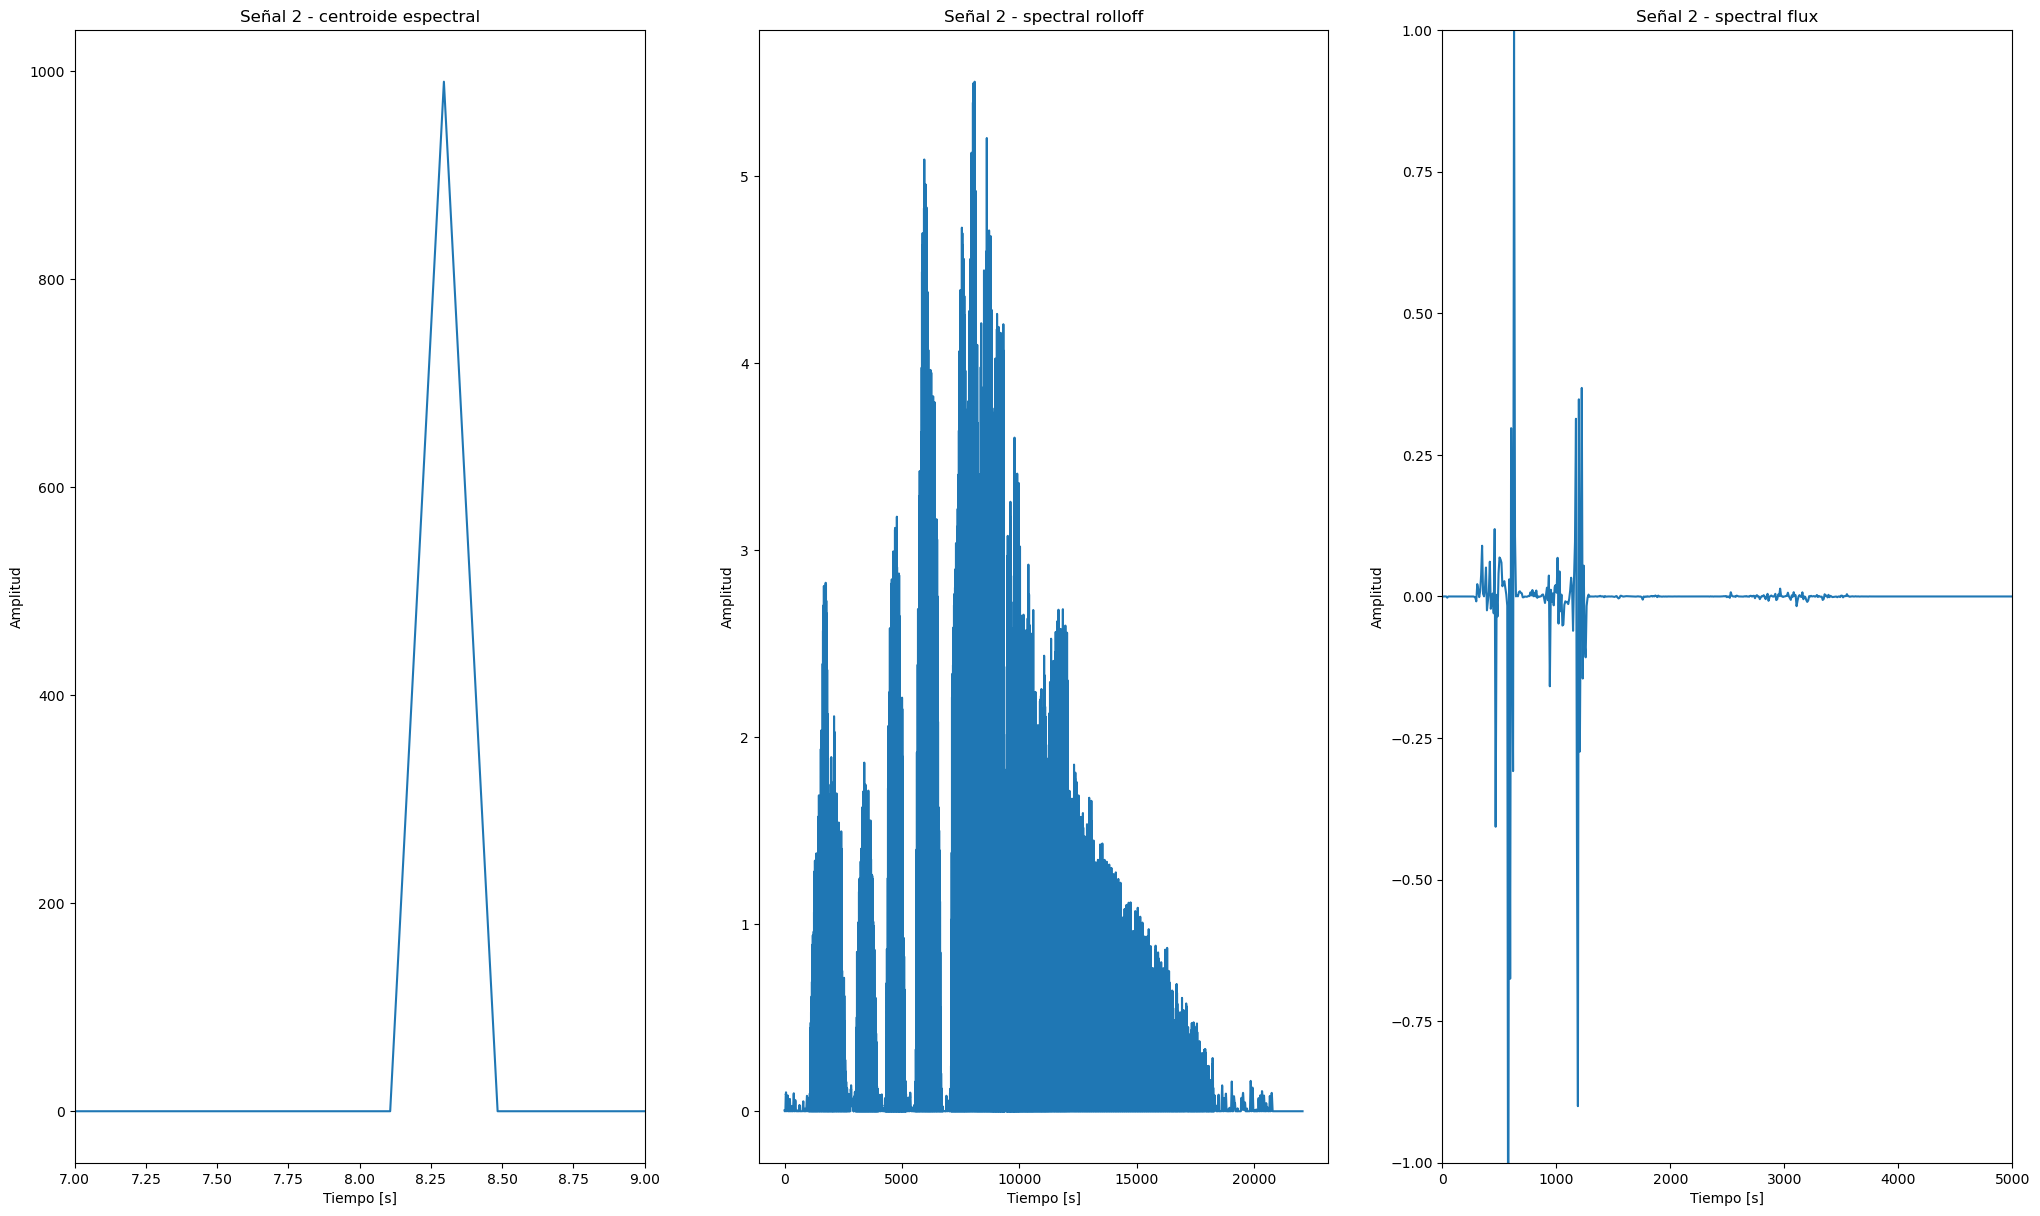

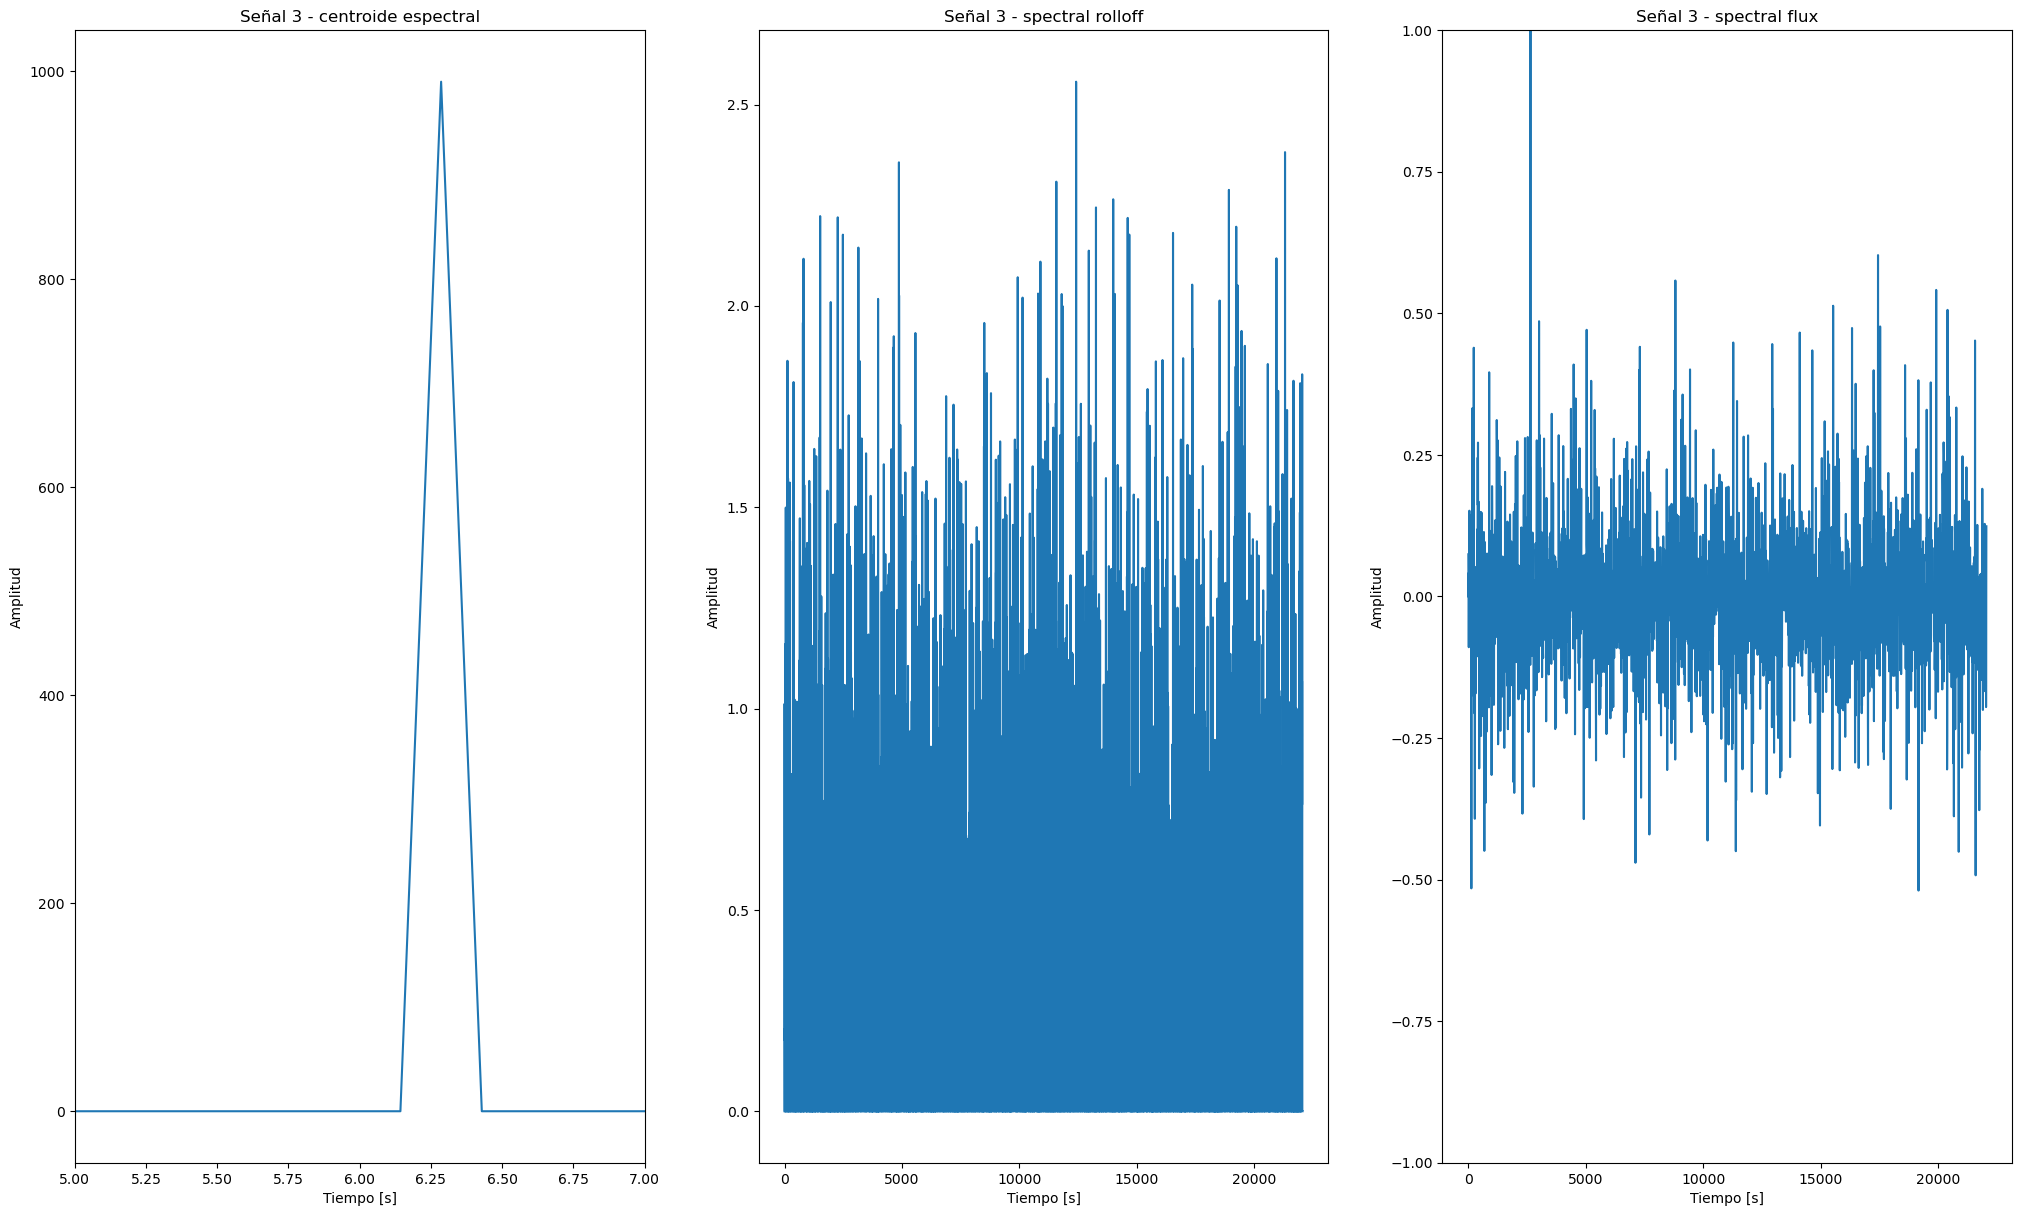

In [22]:
def spectral_centroid ( w ,signal):
    
    signalout = np.empty(0)
        
    if len (signal) % w !=0 :
            
            signalout = np.hstack([signal,np.zeros(w - len (signal) % w )])
           
    else:
                
            signalout = signal
    
    signal_out_tf = np.abs((np.fft.rfft(signalout)))
    
    centroide = np.zeros(len(signal_out_tf/w) ,  dtype = 'complex_')
    
    
    
    for j in range (0 , len(signal_out_tf) // w):
        
        memoria_coef = np.zeros(w,  dtype = 'complex_')
        
        for i in range (0 , w):
            
            memoria_coef [i] = ((i) * signal_out_tf[i+(j*w)]) /(signal_out_tf[i+(j*w)])
            
        centroide[i] = np.sum(memoria_coef)
            
            
    suma_centroide = np.sum(centroide)
    
    return (centroide , signal_out_tf , suma_centroide)


  

def spectral_flux (w,signal):
    
    signalout = np.empty(0)
        
    if len (signal) % w !=0 :
            
            signalout = np.hstack([signal,np.zeros(w - len (signal) % w )])
           
    else:
                
            signalout = signal
    
    signal_out_tf = (np.fft.rfft(signalout))
    
    memoria_amp = np.zeros ((len(signal_out_tf)// w) - 1 , dtype = 'complex_')
    
    for j in range (0 , (len(signal_out_tf) // w) -1):
        
        amplitudes = ((signal_out_tf[w+(j*w)] - signal_out_tf [w + (j*w) +1])**2)
    
        memoria_amp [j] = amplitudes 
        
    flux_sum = np.sum(memoria_amp)
    
    return (memoria_amp , flux_sum , signal_out_tf)
        
        
def spectral_rolloff_csum (w , signal) :


    signalout = np.empty(0)
           
    if len (signal) % w !=0 :
               
                signalout = np.hstack([signal,np.zeros(w - len (signal) % w )])
              
    else:                    
                signalout = signal
        
    signal_out_tf = (np.fft.rfft(signalout))
 
    signal_out_tf = signal
       
    suma = np.zeros ((len(signal_out_tf) // w) )
      
    mth_ventana = 0
       
    index = np.zeros(len(signal_out_tf) // w)
       
    mth_por_ventana = np.zeros ((len(signal_out_tf) // w))

       
       
    for i in range (0 ,(len(signal_out_tf) // w)) :
           
           acum = 0.90 * np.sum(signal_out_tf[i*w : w+((i*w))])
           
           suma[i] = acum
           
           
           
    return (suma)      


def spectral_rolloff_mth (w , signal):
    
    signalout = np.empty(0)
           
    if len (signal) % w !=0 :
               
                signalout = np.hstack([signal,np.zeros(w - len (signal) % w )])
              
    else:                    
                signalout = signal
        
    signal_out_tf = (np.fft.rfft(signalout))
 
    signal_out_tf = signal
    
    
    C = spectral_rolloff_csum(w, signal)
    
    valor_mth_total = np.zeros (len(signal_out_tf)// w , dtype= "complex_")
    
    indice_mth = np.zeros (len(signal_out_tf)// w)
    
    
    for j in range (0, len(signal_out_tf) // w):
        
        valor_mth = 0
        
        index = 0 + j*w
        
        while valor_mth < C[j]:
                
            valor_mth += signal_out_tf[index]
            
            index += 1 
        
        valor_mth_total [j] = valor_mth
        
        indice_mth[j]= index -1
        
            
    return (valor_mth_total, indice_mth , C)


fs = 44100 
M = 45

señal1, fs = sf.read('Sen_al1.wav')
señal2, fs = sf.read('Sen_al2.wav')
señal3, fs = sf.read('Sen_al3.wav')

#####Cálculo de centroide espectral para las 3 señales
centroide_espectral_1 = spectral_centroid(M, señal1)
centroide_espectral_2 = spectral_centroid(M, señal2)
centroide_espectral_3 = spectral_centroid(M, señal3)
frec = np.linspace(0, fs/2, len(centroide_espectral_1[0]))
frec2 = np.linspace(0, fs/2, len(centroide_espectral_2[0]))
frec3 = np.linspace(0, fs/2, len(centroide_espectral_3[0]))

#######Cálculo de spectral rolloff
rol1 = spectral_rolloff_mth (M , señal1)
rol2 = spectral_rolloff_mth (M , señal2)
rol3 = spectral_rolloff_mth (M , señal3)
frec4 = np.linspace(0, fs/2, len(rol1[0]))
frec5 = np.linspace(0, fs/2, len(rol2[0]))
frec6 = np.linspace(0, fs/2, len(rol3[0]))
#######################Cálculo del spectral flux
flux1 = spectral_flux (M,señal1)
flux2 = spectral_flux (M,señal2)
flux3 = spectral_flux (M,señal3)
flux1/=np.max(flux1[0])
flux2/=np.max(flux2[0])
flux3/=np.max(flux3[0])
frec7 = np.linspace(0, fs/2, len(flux1[0]))
frec8 = np.linspace(0, fs/2, len(flux2[0]))
frec9 = np.linspace(0, fs/2, len(flux3[0]))
####Se generó un vector frecuencia por parámetro para no tener problemas de dimensiones en el ploteo



#Ploteos##################################################################
#Plot de señal 1
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 15), dpi = 100)
ax1.set_title("Señal 1 - centroide espectral")
ax1.set_xlabel("Tiempo [s]")
ax1.set_ylabel("Amplitud")
ax1.plot(frec, centroide_espectral_1[0])
ax1.set_xlim(25, 35)

ax2.set_title("Señal 1 - spectral rolloff")
ax2.set_xlabel("Tiempo [s]")
ax2.set_ylabel("Amplitud")
ax2.plot(frec4, rol1[0])
ax2.set_xlim(4500, 20000)

ax3.set_title("Señal 1 - spectral flux")
ax3.set_xlabel("Tiempo [s]")
ax3.set_ylabel("Amplitud")
ax3.plot(frec7, flux1[0])
ax3.set_ylim(-1,1)
ax3.set_xlim(0, 5000)
##Plot de señal 2
figure2, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(25, 15), dpi = 100)
ax4.set_title("Señal 2 - centroide espectral")
ax4.set_xlabel("Tiempo [s]")
ax4.set_ylabel("Amplitud")
ax4.plot(frec2, centroide_espectral_2[0])
ax4.set_xlim(7, 9)

ax5.set_title("Señal 2 - spectral rolloff")
ax5.set_xlabel("Tiempo [s]")
ax5.set_ylabel("Amplitud")
ax5.plot(frec5, rol2[0])

ax6.set_title("Señal 2 - spectral flux")
ax6.set_xlabel("Tiempo [s]")
ax6.set_ylabel("Amplitud")
ax6.plot(frec8, flux2[0])
ax6.set_ylim(-1, 1)
ax6.set_xlim(0, 5000)

#Plot de señal 3
figure2, (ax7, ax8, ax9) = plt.subplots(1, 3, figsize=(25, 15), dpi = 100)
ax7.set_title("Señal 3 - centroide espectral")
ax7.set_xlabel("Tiempo [s]")
ax7.set_ylabel("Amplitud")
ax7.plot(frec3, centroide_espectral_3[0])
ax7.set_xlim(5, 7)

ax8.set_title("Señal 3 - spectral rolloff")
ax8.set_xlabel("Tiempo [s]")
ax8.set_ylabel("Amplitud")
ax8.plot(frec6, rol3[0])


ax9.set_title("Señal 3 - spectral flux")
ax9.set_xlabel("Tiempo [s]")
ax9.set_ylabel("Amplitud")
ax9.plot(frec9, flux3[0])
ax9.set_ylim(-1,1)




La función Spectral Centroid se utiliza para dar una noción del centro de gravedad del espectro y caracteriza el brillo en el sonido de una señal determinada.\
La función Spectral Flux mide la diferencia en amplitud entre el valor final de una ventana y el valor inicial de la ventana siguiente, indicando así los cambios en amplitud en espectro de una ventana a la siguiente.\
Por último, la función Spectral Rolloff indica mediante una suma acumulativa de los valores de una ventana cuando estos alcanzan el 90% del valor de la suma total de esa ventana, determinando así a partir de cual valor la señal ya no aporta información sustancial. 

## Ejercicio 11

En este caso, se calcula y se grafica la DFT de las señales del Ejercicio 1 y Ejercicio 3, utilizando tres ventanas diferentes: Rectangular, Hann y Blackman.
Luego se calculan y se grafican las transformadas de las ventanas utilizadas.

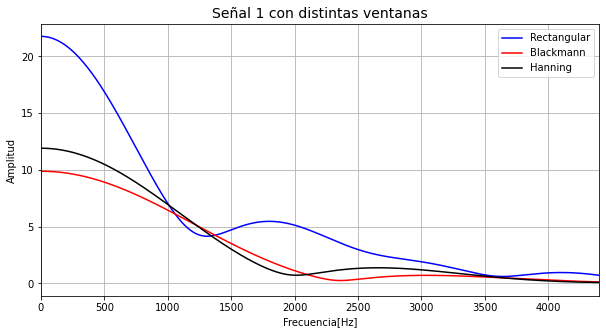

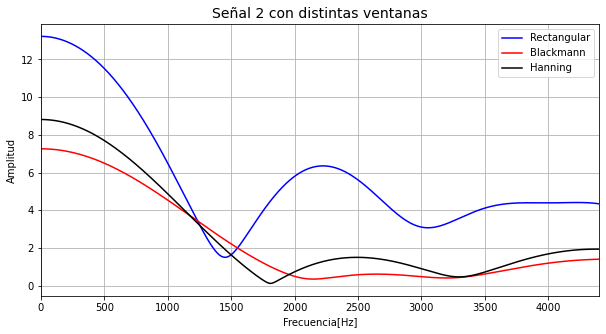

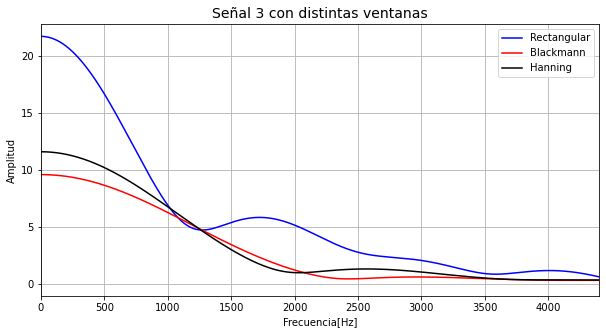

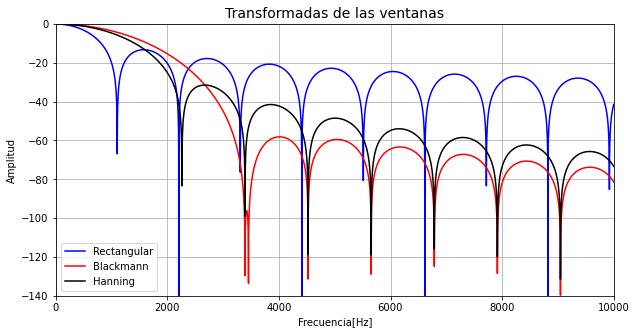

In [15]:
################################################Señal 1 (SIN RUIDO)#######################
fs = 44100
f = 440
t = np.linspace(0, 1, fs)
sig1 = np.zeros(len(t)) #vector de ceros de largo t (1/fs)
for i in range (1, 6): #sumo los senos en un ciclo
    sig = np.sin(2*np.pi*i*f*t)*1/i #1/i es la atenuación en la amplitud 
    sig1 = sig1+sig
sig1 = sig1/np.max(sig1)    
sigasd = sig1
#############################VENTANEO CON RECTANGULAR#################################################
m = 40
ventana = np.append(np.ones(m), np.zeros(len(t)-m))
# plt.figure(1)
vrec = np.abs(np.fft.rfft(ventana*sigasd))
frec = np.arange(0, (fs/2)+1)

##################################VENTANEO CON BLACKMAN###################################################
black = np.append(np.blackman(m), np.zeros(len(t)-m))
vblack = np.abs(np.fft.rfft(black*sigasd))

#####################################VENTANEO HANN##################################################
han = np.append(np.hanning(m), np.zeros(len(t)-m))
vhan = np.abs(np.fft.rfft(han*sigasd))

#Se grafican las transformadas
plt.figure(1, figsize=(10, 5))
plt.plot(frec, vrec, color='blue', label='Rectangular')
plt.plot(frec, vblack, color='red', label='Blackmann')
plt.plot(frec, vhan, color='black', label='Hanning')
plt.title('Señal 1 con distintas ventanas', fontsize=14)
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.xlim(0, 10*f)



####################################SEÑAL 3 (RUIDO) DESVIO = 1###################################################
noise = np.random.normal(0, 1, len(t))
sig_ruido = sigasd + noise
################################### Ventaneo la señal con ruido con una rectangular#################
vrec_n = np.abs(np.fft.rfft(sig_ruido*ventana))

###################################VENTANEO CON BLACKMAN A LA SEÑAL CON RUIDO (DESVIO = 1)##################
vblack_n = np.abs(np.fft.rfft(black*sig_ruido))

###################################VENTANEO CON HANNING#######################################
vhan_N = np.abs(np.fft.rfft(han*sig_ruido))




#Se grafican las transformadas
plt.figure(2, figsize=(10, 5))
plt.plot(frec, vrec_n, color='blue', label='Rectangular')
plt.plot(frec, vblack_n, color='red', label='Blackmann')
plt.plot(frec, vhan_N, color='black', label='Hanning')
plt.title('Señal 2 con distintas ventanas', fontsize=14)
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.xlim(0, 10*f)


#################################SEÑAL 3 RUIDO CON DESVIO = 0.1 #############################################
noise00 = np.random.normal(0, 0.1, len(t))
sig_ruido2 = sigasd + noise00
################################### Ventaneo la señal con ruido con una rectangular (DESVIO = 3)#################
vrec_n2 = np.abs(np.fft.rfft(sig_ruido2*ventana))

###################################VENTANEO CON BLACKMAN A LA SEÑAL CON RUIDO (DESVIO = 0.1)##################
vblack_n2 = np.abs(np.fft.rfft(black*sig_ruido2))

###################################VENTANEO CON hanning A LA SEÑAL CON RUIDO (DESVIO = 0.1)##################
vhan_N2 = np.abs(np.fft.rfft(han*sig_ruido2))



#Se grafican las transformadas
plt.figure(3, figsize=(10, 5))
plt.plot(frec, vrec_n2, color='blue', label='Rectangular')
plt.plot(frec, vblack_n2, color='red', label='Blackmann')
plt.plot(frec, vhan_N2, color='black', label='Hanning')
plt.title('Señal 3 con distintas ventanas', fontsize=14)
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.xlim(0, 10*f)



#################################SEÑAL 3 RUIDO CON DESVIO = 3 #############################################
noise001 = np.random.normal(0, 3, len(t))
sig_ruido3 = sigasd + noise001
################################### Ventaneo la señal con ruido con una rectangular (desvio = 3)#################
vrec_n3 = np.abs(np.fft.rfft(sig_ruido3*ventana))

###################################VENTANEO CON BLACKMAN A LA SEÑAL CON RUIDO (DESVIO = 0.1)##################
vblack_n3 = np.abs(np.fft.rfft(black*sig_ruido3))

###################################VENTANEO CON hanning A LA SEÑAL CON RUIDO (DESVIO = 3)##################
vhan_N3 = np.abs(np.fft.rfft(han*sig_ruido3))


#Se grafican las transformadas
plt.figure(4, figsize=(10, 5))
plt.plot(frec, vrec_n3, color='blue', label='Rectangular')
plt.plot(frec, vblack_n3, color='red', label='Blackmann')
plt.plot(frec, vhan_N3, color='black', label='Hanning')
plt.title('Señal 4 con distintas ventanas', fontsize=14)
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.xlim(0, 10*f)


#######################################FFT DE LAS VENTANAS Y ESCALADO EN DB####################################
#######################################VENTANA RECTANGULAR###############################
ventana_fft = np.abs(np.fft.rfft(ventana))
ventana_fft+=np.finfo(float).eps
ventana_fft=ventana_fft/np.max(ventana_fft)
ventana_fftdB=20*np.log10(ventana_fft)

###################################################Ventana de BLACKMAN########################
black_fft = np.abs(np.fft.rfft(black))
black_fft+=np.finfo(float).eps
black_fft = black_fft/np.max(black_fft)
black_fftdB = 20*np.log10(black_fft)

#######################Ventana de hanning###################################################
han_fft = np.abs(np.fft.rfft(han))
han_fft+=np.finfo(float).eps
han_fft = han_fft/np.max(han_fft)
han_fftdB = 20*np.log10(han_fft)



#Se grafican las transformadas de las ventanas en dB
plt.figure(4, figsize=(10, 5))
plt.plot(frec, ventana_fftdB, color='blue', label='Rectangular')
plt.plot(frec, black_fftdB, color='red', label='Blackmann')
plt.plot(frec, han_fftdB, color='black', label='Hanning')
plt.title('Transformadas de las ventanas', fontsize=14)
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Amplitud')
plt.ylim(-140, 0 )
plt.xlim(0, 10000)
plt.grid(plt.figure(4))

Se pueden observar en los gráficos, principalmente los distintos comportamientos de las ventanas a la hora de calcular la DFT de una señal. Es evidente que que la ventana rectangular ofrece mejor resolución en frecuencia (un lóbulo principal más angosto) que el resto de las ventanas, pero la diferencia de nivel entre el lóbulo principal y el secundario, es menor.
Por último, el gráfico de las transformadas de las ventanas, proponen esta misma idea de una forma más clara. en donde se puede observar claramente cómo se manifiestan los lóbulos principales y secundarios de cada ventana.


## Ejercicio 12

En este ejercicio se toma la señal del Ejercicio 3 y se le aplica un filtro de media movil. Se busca el largo de ventana del filtro **M** tal que se atenúe no más de 3 dB la componente de 880 Hz. Luego, se grafican las respuestas en frecuencia de las señales filtradas.

El largo de ventana encontrado es:  30


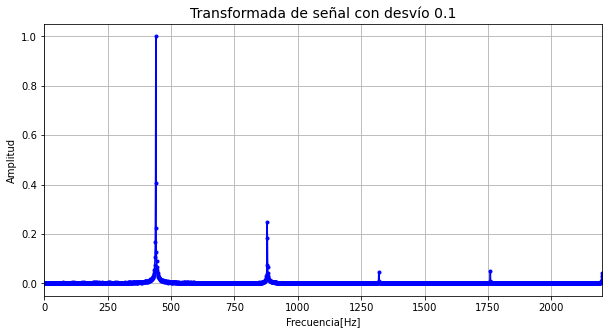

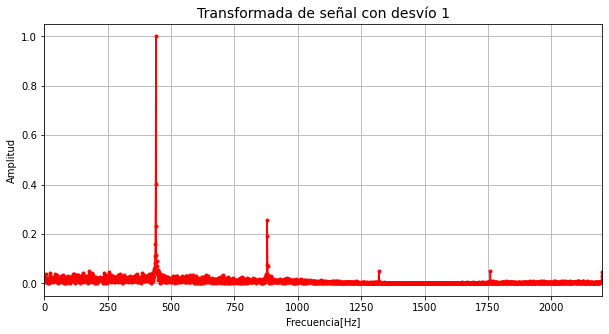

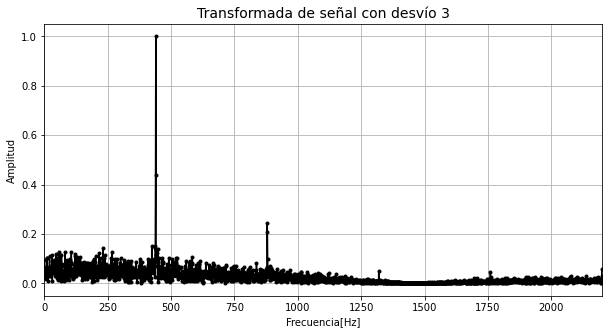

In [16]:
#Se busca el valor de M que cumpla con la condición solicitada
M=0
for i in range(1,fs):
    h=np.hstack([np.ones(i),np.zeros(fs-i)])
    H=np.fft.rfft(h)
    Hn=abs(H)/max(H)
    if Hn[880] <= 0.5: #-3dB equivale al 50% de energía
        M=i-1
        break

#Se aplica el filtro a la señal
filtrado1 = mediamovili(sig_ruido2, M) #señal con desvío 0.1
filtrado2 = mediamovili(sig_ruido, M) #señal con desvío 1
filtrado3 = mediamovili(sig_ruido3,M) #señal con desvío 3
#Se imprime el valor de M encontrado
print('El largo de ventana encontrado es: ', M)

#La transformada de las señales filtradas con el filtro de media movil
transformada1 = np.abs(np.fft.rfft(filtrado1)) 
transformada2 = np.abs(np.fft.rfft(filtrado2))
transformada3 = np.abs(np.fft.rfft(filtrado3))

frec = np.arange(0,(fs/2)+1)

#Zero Padding para que coincida la longitud de las señales con la del vector frecuencia
transformada1 = np.append(transformada1, np.zeros(len(frec)-len(transformada1)))
transformada2 = np.append(transformada2, np.zeros(len(frec)-len(transformada2)))
transformada3 = np.append(transformada3, np.zeros(len(frec)-len(transformada3)))


#Se normalizan las amplitudes de las transformadas
transformada1/=np.max(transformada1)
transformada2/=np.max(transformada2)
transformada3/=np.max(transformada3)

#Se grafica la primera transformada
plt.figure(1, figsize=(10, 5))
plt.plot(frec, transformada1, '.-',color='blue')
plt.xlim(0, 5*f)
plt.title('Transformada de señal con desvío 0.1', fontsize=14)
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Amplitud')
plt.xlim(0, 5*f)
plt.grid()

#Se grafica la segunda transformada
plt.figure(2, figsize=(10, 5))
plt.plot(frec, transformada2, '.-',color='red')
plt.xlim(0, 5*f)
plt.title('Transformada de señal con desvío 1', fontsize=14)
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Amplitud')
plt.xlim(0, 5*f)
plt.grid()

#Se grafica la tercera transformada
plt.figure(3, figsize=(10, 5))
plt.plot(frec, transformada3, '.-',color='black')
plt.xlim(0, 5*f)
plt.title('Transformada de señal con desvío 3', fontsize=14)
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Amplitud')
plt.xlim(0, 5*f)
plt.grid()




Observando los gráficos, resulta visible el efecto del desvío estándar en la definición del la señal de ruido. Si bien se ven con mayor amplitud las componentes frecuenciales de las señales, cuando el desvío es mayor, las componentes de frecuencia que no están en la señal original, se manifiestan con mayor amplitud.

## Ejercicio 13

True


(0.0, 3000.0)

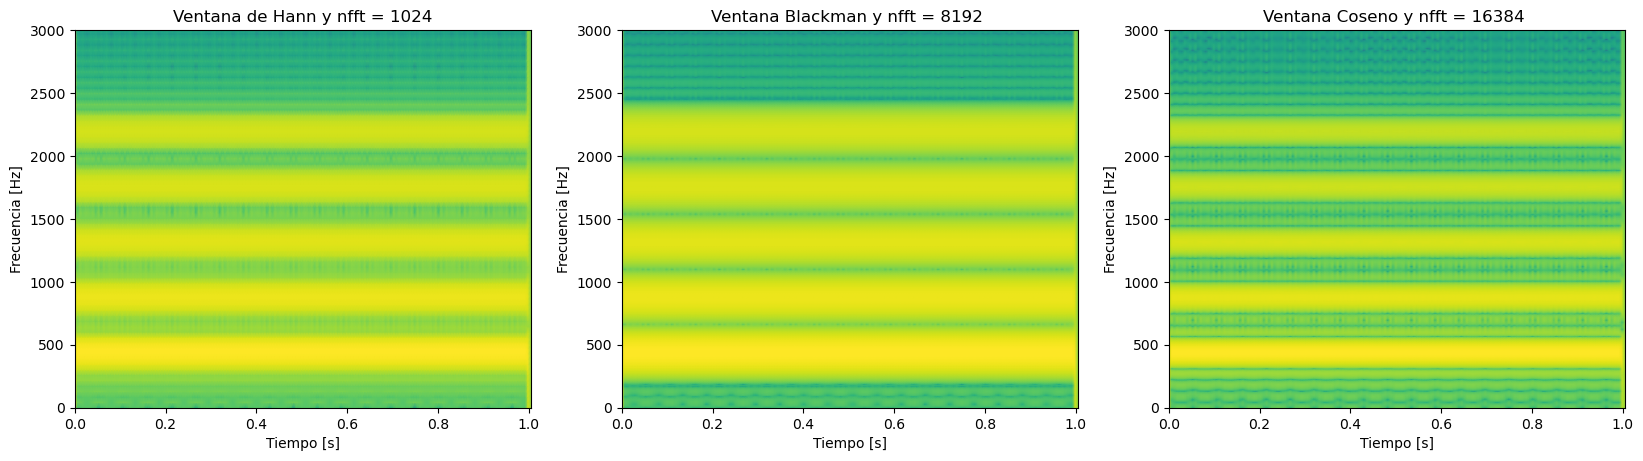

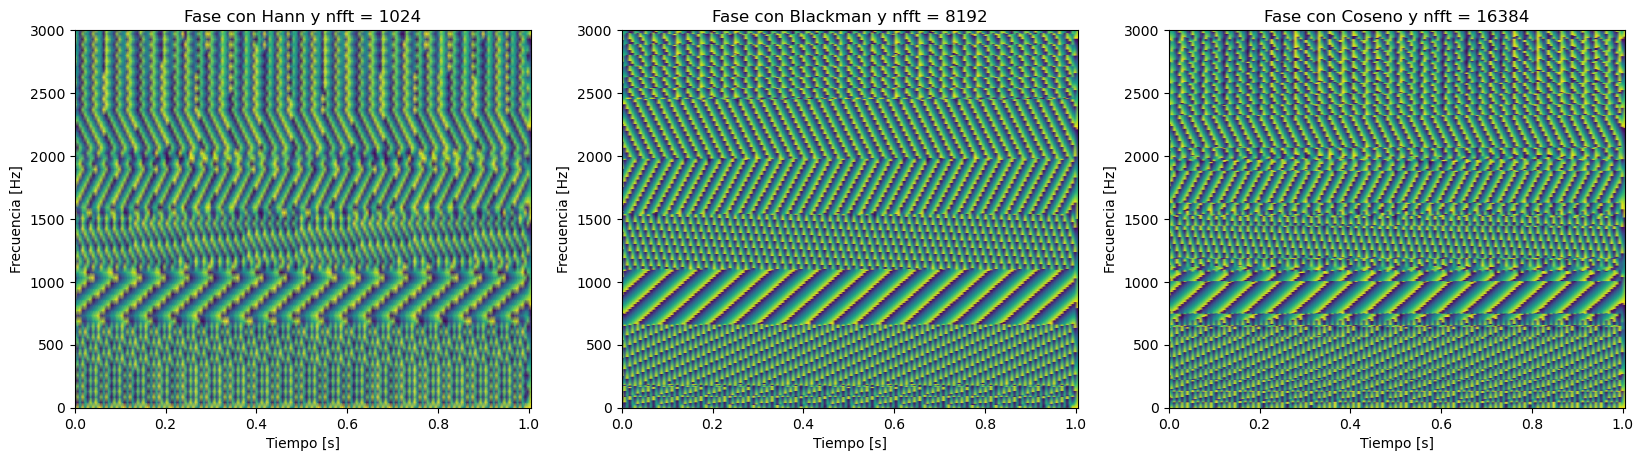

In [31]:
fs = 44100
f = 440
t = np.linspace(0, 1, fs)
sig1 = np.zeros(len(t)) #vector de ceros de largo t (1/fs)
for i in range (1, 6): #sumo los senos en un ciclo
    sig = np.sin(2*np.pi*i*f*t)*1/i #1/i es la atenuación en la amplitud 
    sig1 = sig1+sig
sig1 = sig1/np.max(sig1)    
sigasd = sig1



win = 'hann'
win2 = 'blackman'
win3 = 'cosine'
nperseg = 512
noverlap = nperseg//2 #se solapan la mitad de las muestras de cada ventana temporal
nfft = 1024 #15 potencia de 2
nfft2 = 16384
nfft3 = 8192
return_onesided = True

print(signal.check_NOLA(win,nperseg,noverlap))

f,t,Xxx = signal.stft(sigasd, fs = fs, window=win, nperseg=nperseg, nfft=nfft, noverlap=noverlap, return_onesided=return_onesided)
f2,t2,Xxx2 = signal.stft(sigasd, fs = fs, window=win2, nperseg=nperseg, nfft=nfft3, noverlap=noverlap, return_onesided=return_onesided)# plt.figure(1)
f3,t3,Xxx3 = signal.stft(sigasd, fs = fs, window=win3, nperseg=nperseg, nfft=nfft3, noverlap=noverlap, return_onesided=return_onesided)
fig,(ax1,ax2, ax3) = plt.subplots(1,3,figsize=(20,5)  , dpi=100)
ax1.set_ylabel('Frecuencia [Hz]')
ax1.set_xlabel('Tiempo [s]')
ax1.pcolormesh(t, f, np.log10(np.abs(Xxx)), shading='gouraud')
ax1.set_title('Ventana de Hann y nfft = 1024')
ax1.set_ylim(0, 3000)

# fig,ax = plt.subplots(figsize=(7,5)  , dpi=80)
ax2.set_ylabel('Frecuencia [Hz]')
ax2.set_xlabel('Tiempo [s]')
ax2.pcolormesh(t2, f2, np.log10(np.abs(Xxx2)), shading='gouraud')
ax2.set_title('Ventana Blackman y nfft = 8192 ')
ax2.set_ylim(0, 3000)


# fig,ax = plt.subplots(figsize=(7,5)  , dpi=80)
ax3.set_ylabel('Frecuencia [Hz]')
ax3.set_xlabel('Tiempo [s]')
ax3.pcolormesh(t3, f3, np.log10(np.abs(Xxx3)), shading='gouraud')
ax3.set_title('Ventana Coseno y nfft = 16384 ')
ax3.set_ylim(0, 3000)




#Grafico ahora cambiando las ventanas y dejando el nfft que mejor pareció de los 3 que probé (8192) 
#No parece que el suavizado aporte mucho a este ejemplo


fig2,(ax4,ax5, ax6) = plt.subplots(1,3,figsize=(20,5)  , dpi=100)
ax4.set_ylabel('Frecuencia [Hz]')
ax4.set_xlabel('Tiempo [s]')
ax4.pcolormesh(t, f, np.angle(Xxx), shading='gouraud')
ax4.set_title('Fase con Hann y nfft = 1024')
ax4.set_ylim(0, 3000)


ax5.set_ylabel('Frecuencia [Hz]')
ax5.set_xlabel('Tiempo [s]')
ax5.pcolormesh(t2, f2, np.angle(Xxx2), shading='gouraud')
ax5.set_title('Fase con Blackman y nfft = 8192')
ax5.set_ylim(0, 3000)

ax6.set_ylabel('Frecuencia [Hz]')
ax6.set_xlabel('Tiempo [s]')
ax6.pcolormesh(t3, f3, np.angle(Xxx3), shading='gouraud')
ax6.set_title('Fase con Coseno y nfft = 16384')
ax6.set_ylim(0, 3000)

Teniendo el conocimiento del contenido de la señal a analizar, se eligieron una cantidad de *nperseg* de modo que se garantice una buena resolución en frecuencia, a pesar de la baja resolución en tiempo. Esto es debido a que se sabe que la señal no presenta transitorios, si la señal presentara variaciones en el tiempo, se debería reconsiderar la cantidad de nperseg a modo de obtener un equilibrio resolutivo entre frecuencia y tiempo. De este modo, se eligieron 512 nperseg. Por el lado de la cantidad de *nfft*, se escogieron potencias de 2 mayores a la correspondiente para los nperseg elegidos; las mismas aportaron un suavizado en las gráficas pero se notó que para una misma ventana, no hay una notable diferencia de resolución al usar una cantidad de nfft=8192 o nfft=16384.\
En cuanto a las ventanas empleadas, la mejor resolución frecuencial obtenida fue usando la ventana Coseno. Sin embargo, la mejor resolución de fase se obtuvo con la ventana de Blackman, aunque esta última no es de gran importancia gráfica.
